# **Assignment 3: Web Security**

**Group members:**
- Sebastián Granizo (00212771)
- Johana Duchi (00321980)
- Daniela Jiménez (00322800)
----------


## **Part 1: picoCTF**


- Solve the exercises in the picoCTF platform
- Explain the method you used to find the flag
- Provide an explanation of wich OWASP Top 10 was exploited
- What would be a way to patch the vulnerability?

1. _Local Authority (Steps and Explanation):_

First we inspect the source code of the webpage.
After doing that I tried with a dummy user and a dummy password.
After getting to the login.php page I inspected the source code again
and found this:
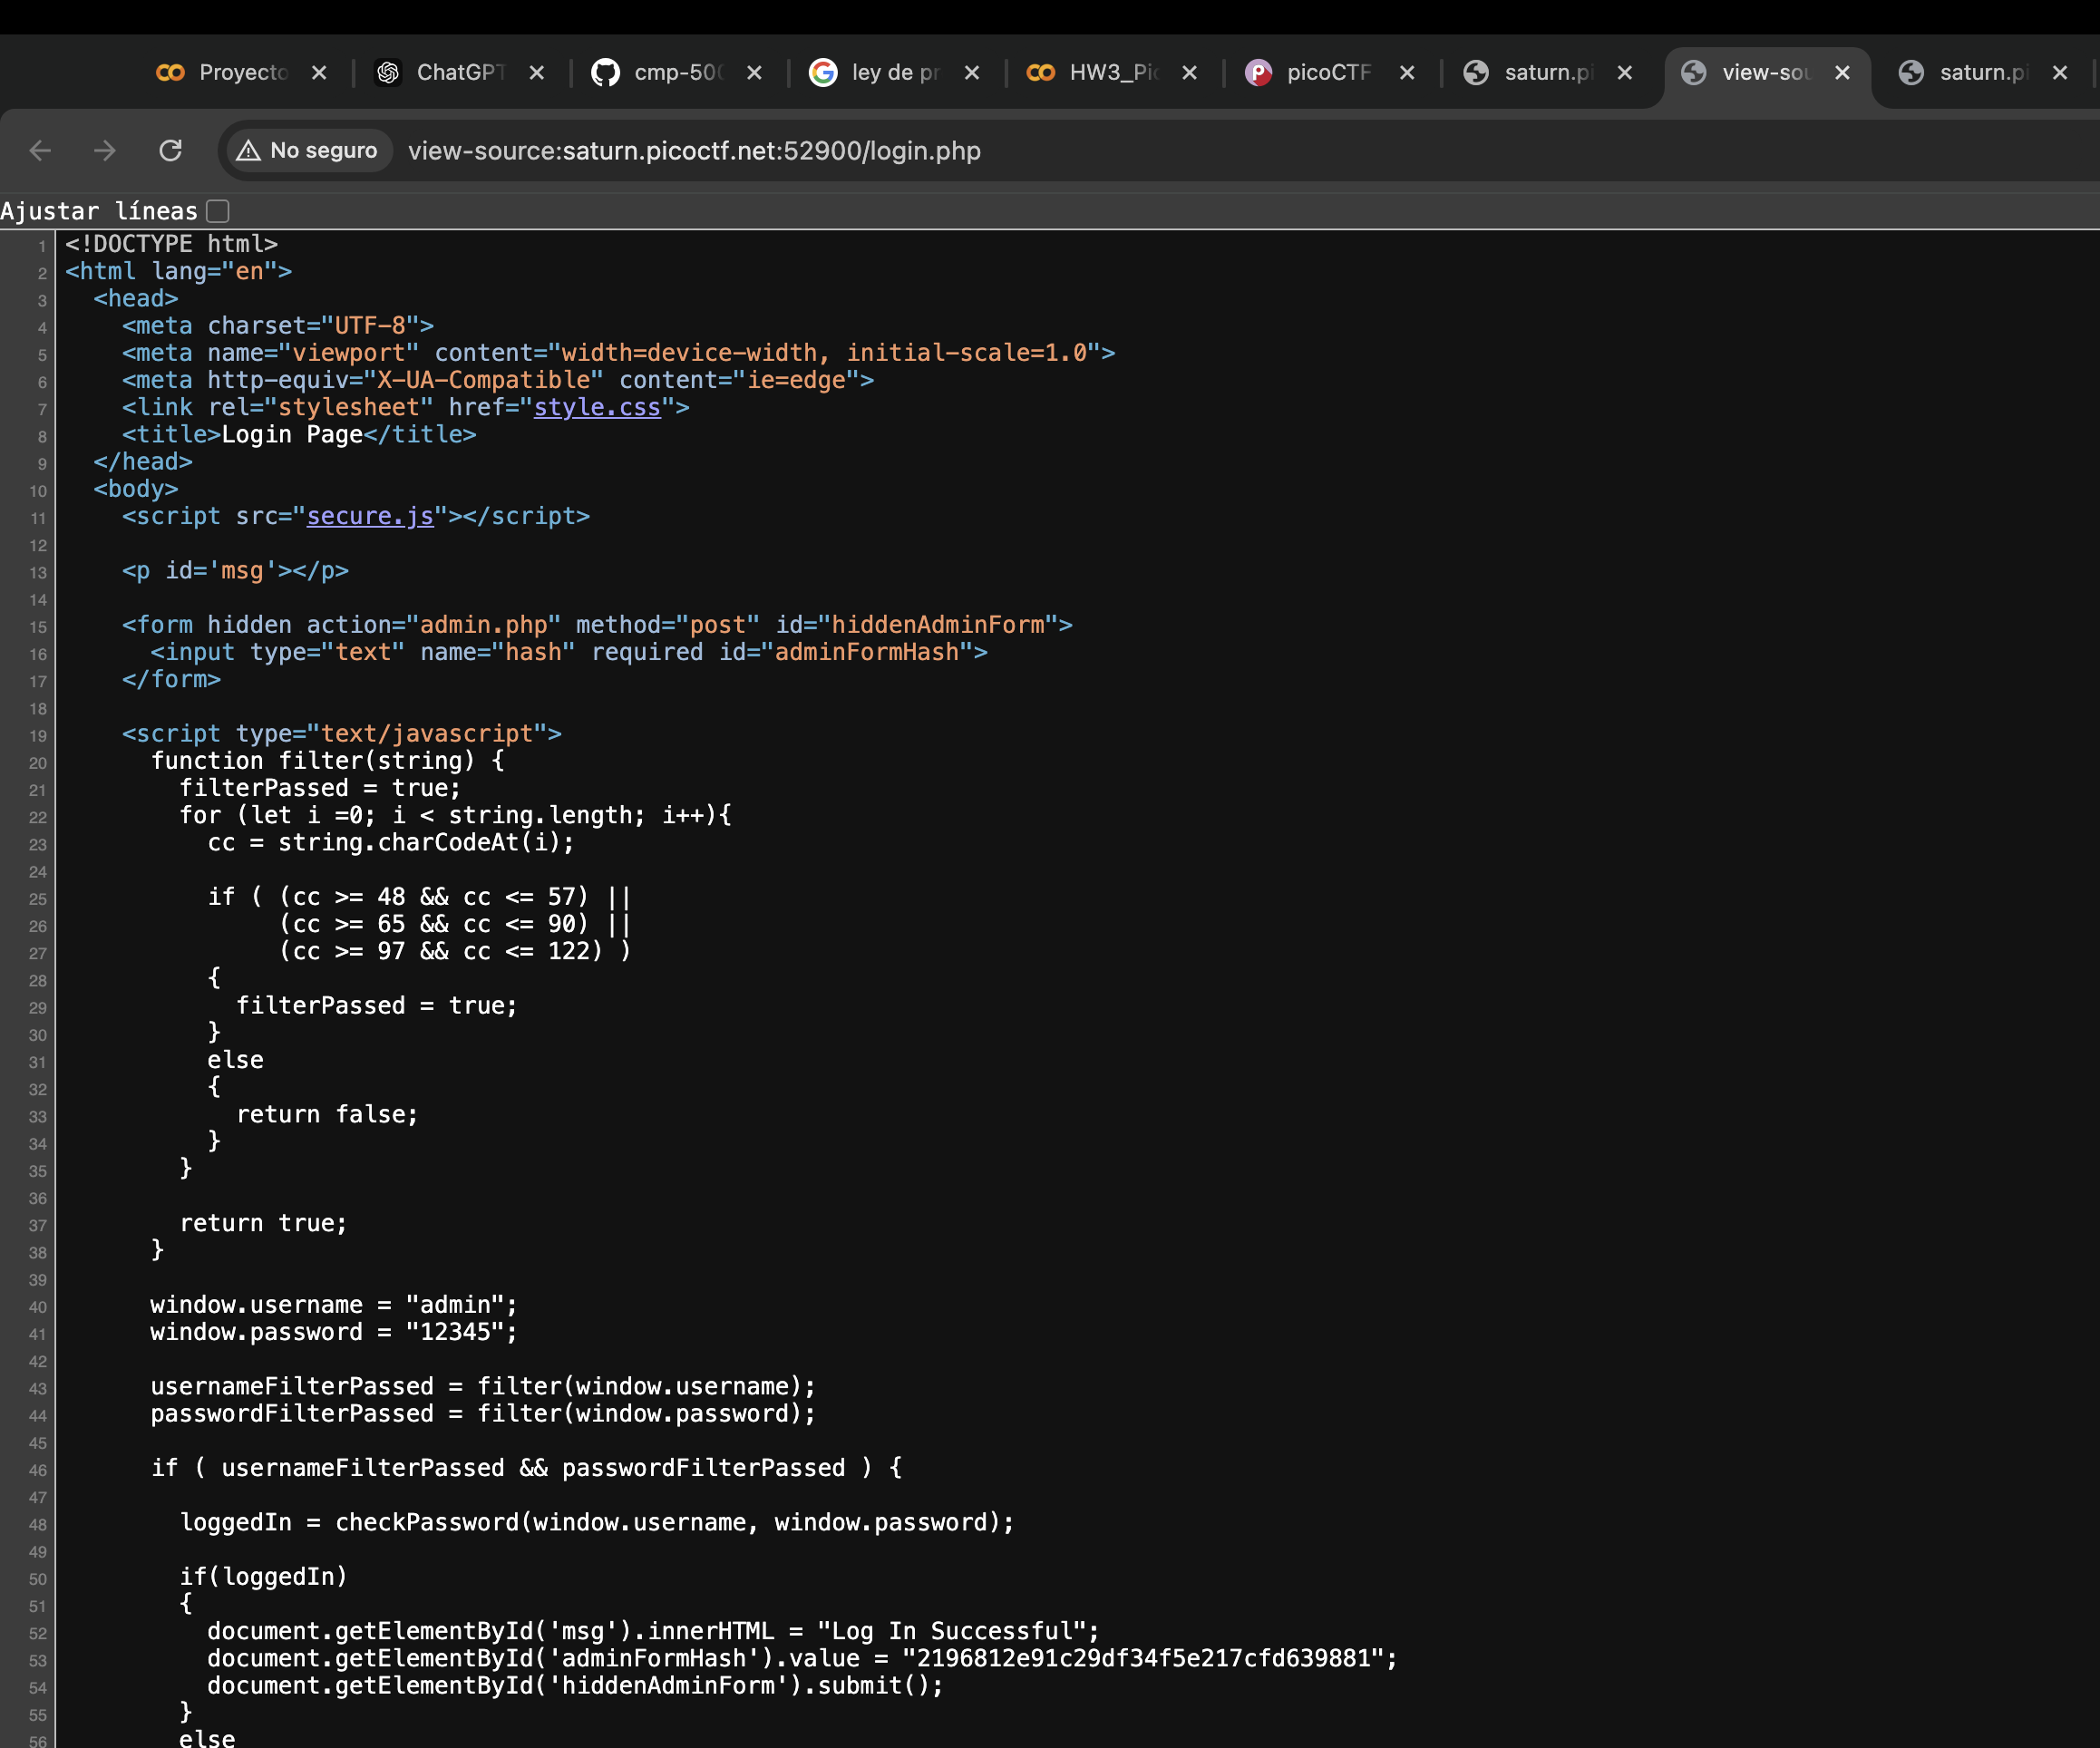

Theres an js script

Once I opened the secure JS script I found this:
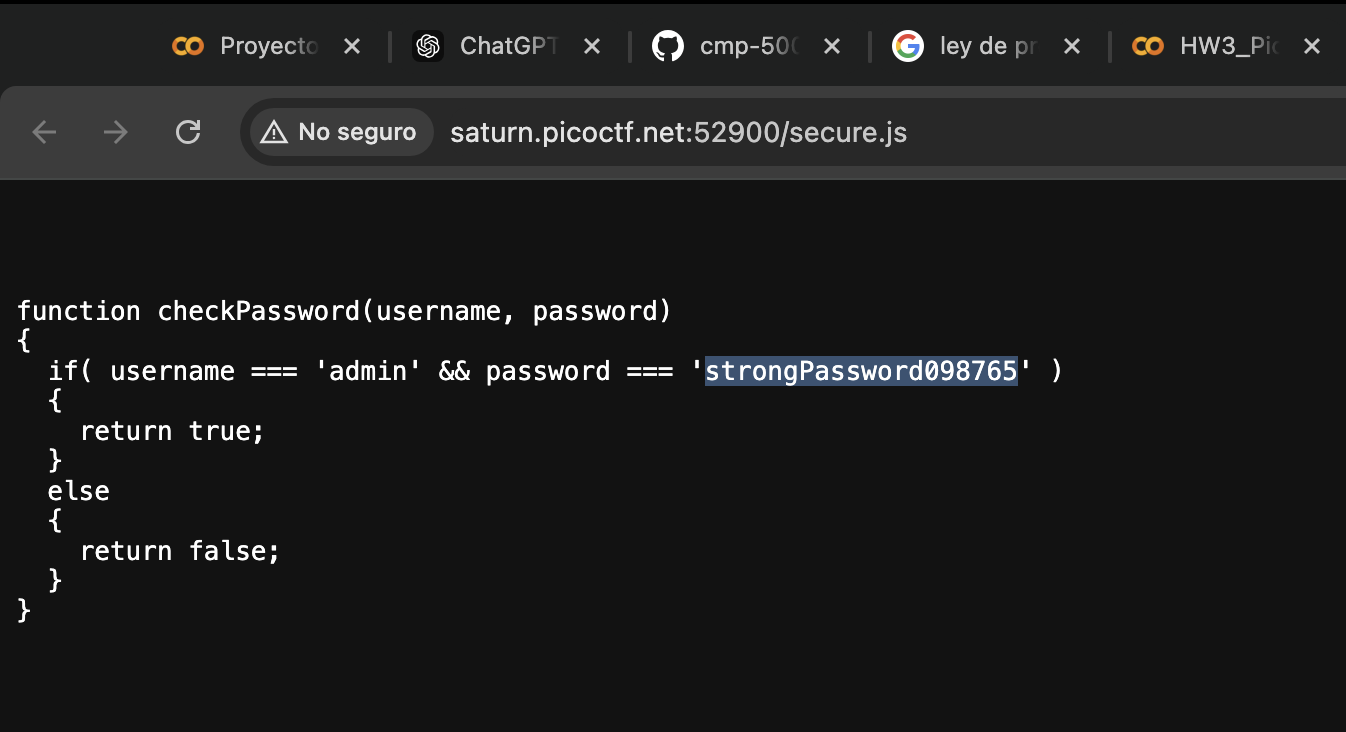

After doing this we are able to find the user and the password, once we login with the given credentials we get the flag, which is:
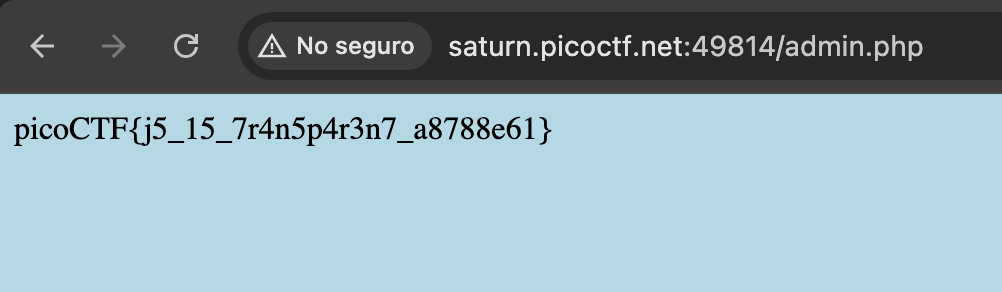


The OWASP Top 10 that was exploited is: A01:2021 – Broken Access Control
This vulnerability applies if sensitive information like credentials is included in areas of the webpage that users should not access. If the credentials are exposed in the source code, it indicates a failure to restrict access to sensitive data properly.

Patch:
A good way to patch this would be to remove the credentials from the unsafe javascript file



2. _WebDecode (Steps and Explanation)_:

**Solve the exercises in the picoCTF platform**
**Explain the method you used to find the flag**

The first action was to load the webpage. Upon loading the page, I noticed a message that said "Ha!!!!!! You looking for a flag?" and a prompt to "Keep Navigating." This message suggested that the flag was hidden somewhere within the site and indicated the need for further exploration to locate it.

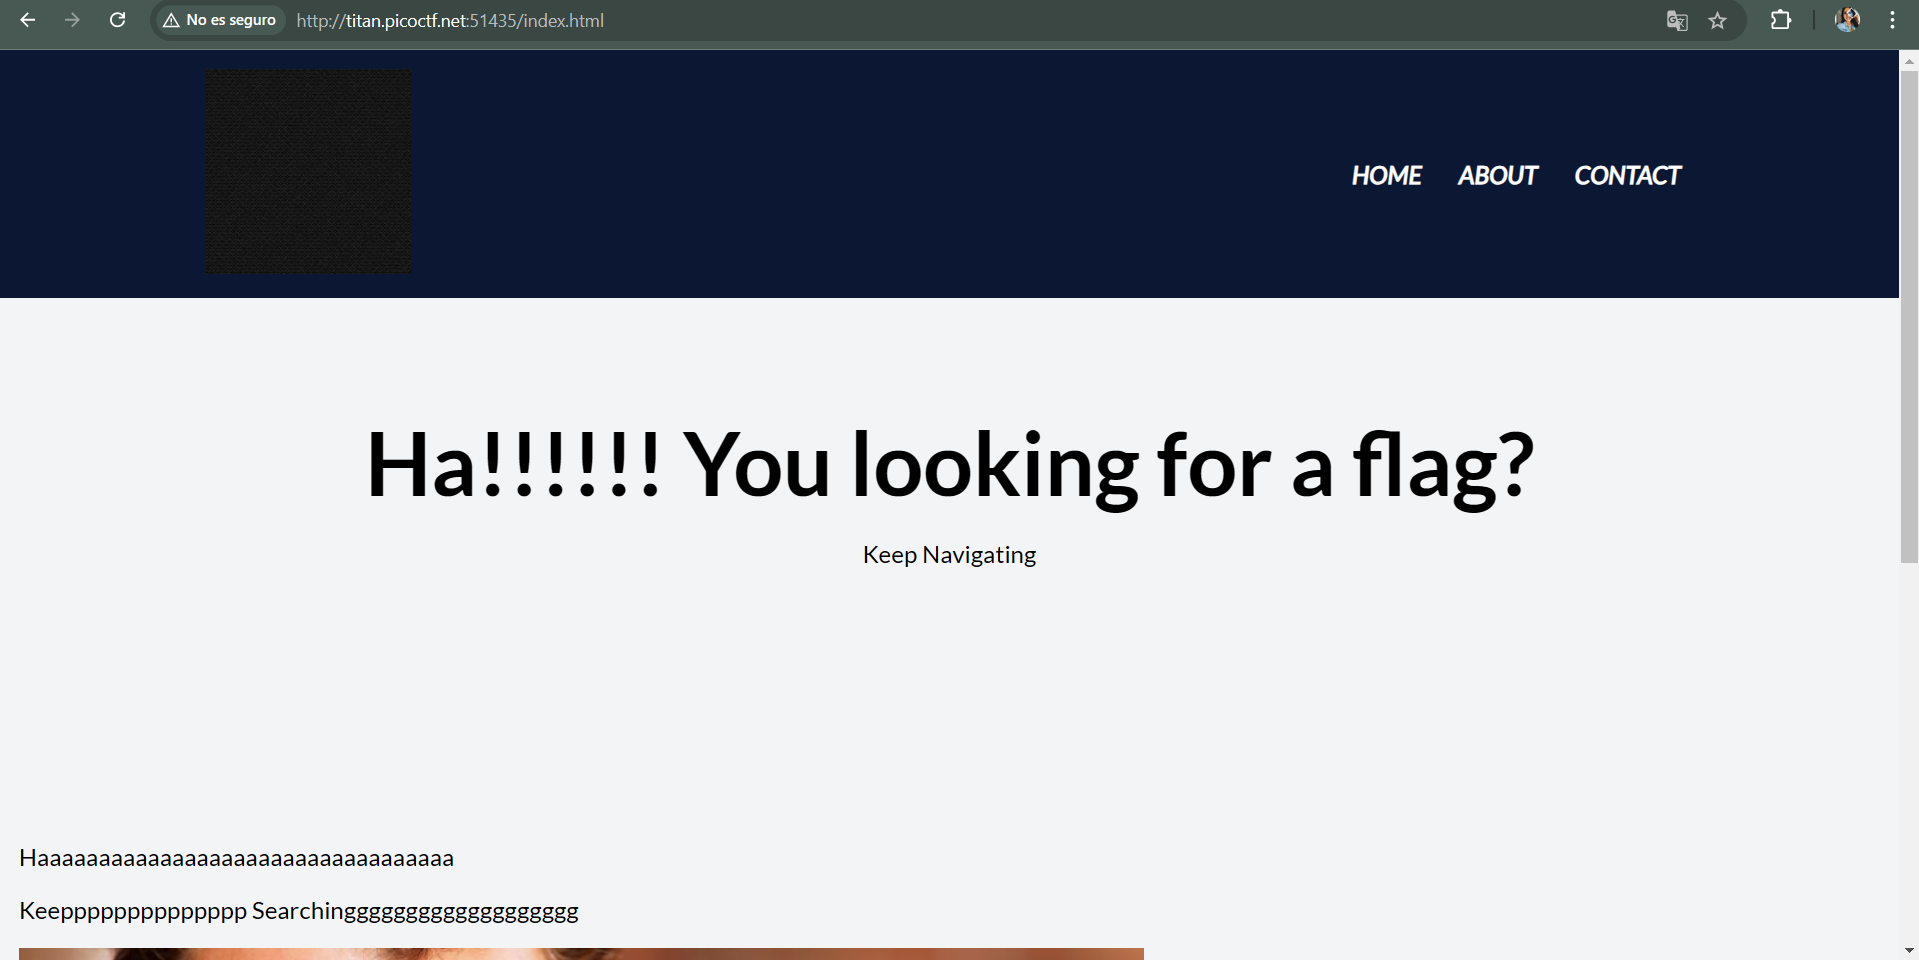

Following the hint, I navigated to the "About" section of the webpage. There, I used the browser's inspect tool (right-click and select "Inspect") to examine the HTML source code. In the code, I found a string notified true. This looked like a potential clue, so I focused on this part of the code.

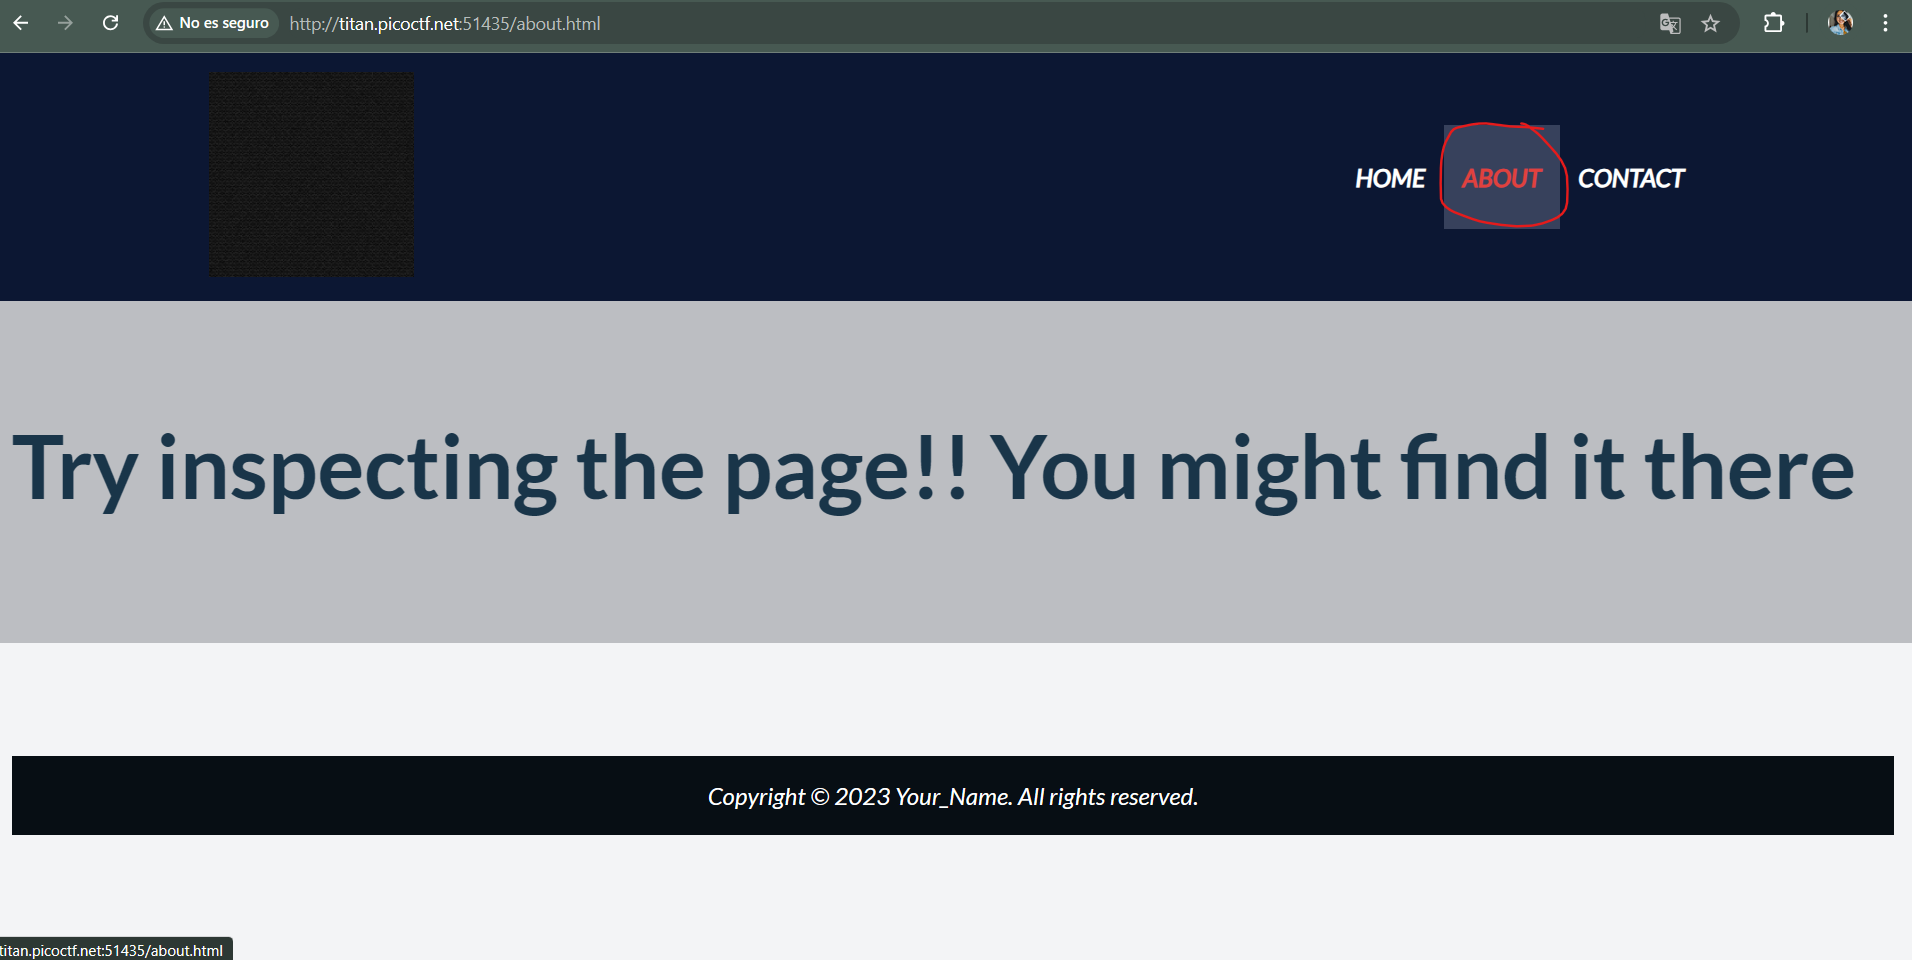

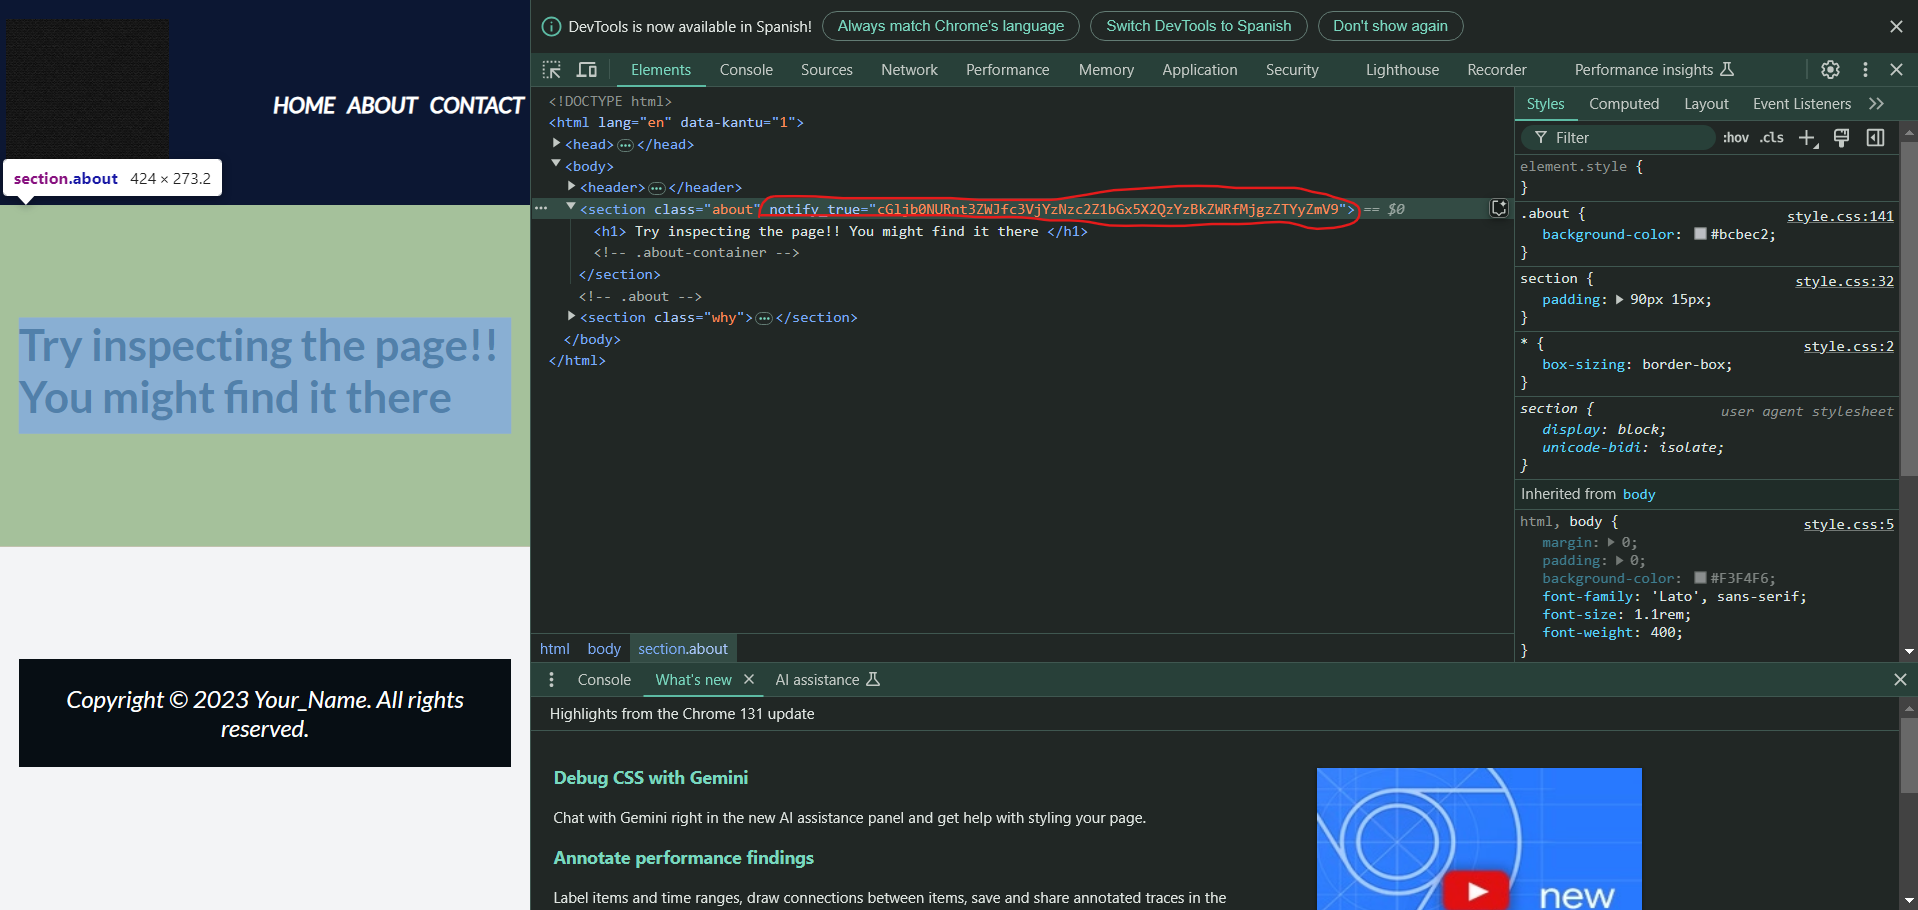

While inspecting the HTML, I discovered a long string that started with cG1jb0NURnt3WJfc3VjYzNz.... This string appeared to be encoded in base64, which is a common encoding format used to store data in a readable format. Since base64 encoding is frequently used to hide information like flags in CTF challenges, I recognized this string as something that needed to be decoded.

To decode the base64 string, I used CyberChef, an online tool designed for decoding encoded data. I opened CyberChef in a web browser and selected the "From Base64" operation. I then pasted the encoded string into the input field of CyberChef and executed the operation. The output from CyberChef revealed the decoded flag: picoCTF{web_succ3ssfully_d3c0de_d_283e62fe}.

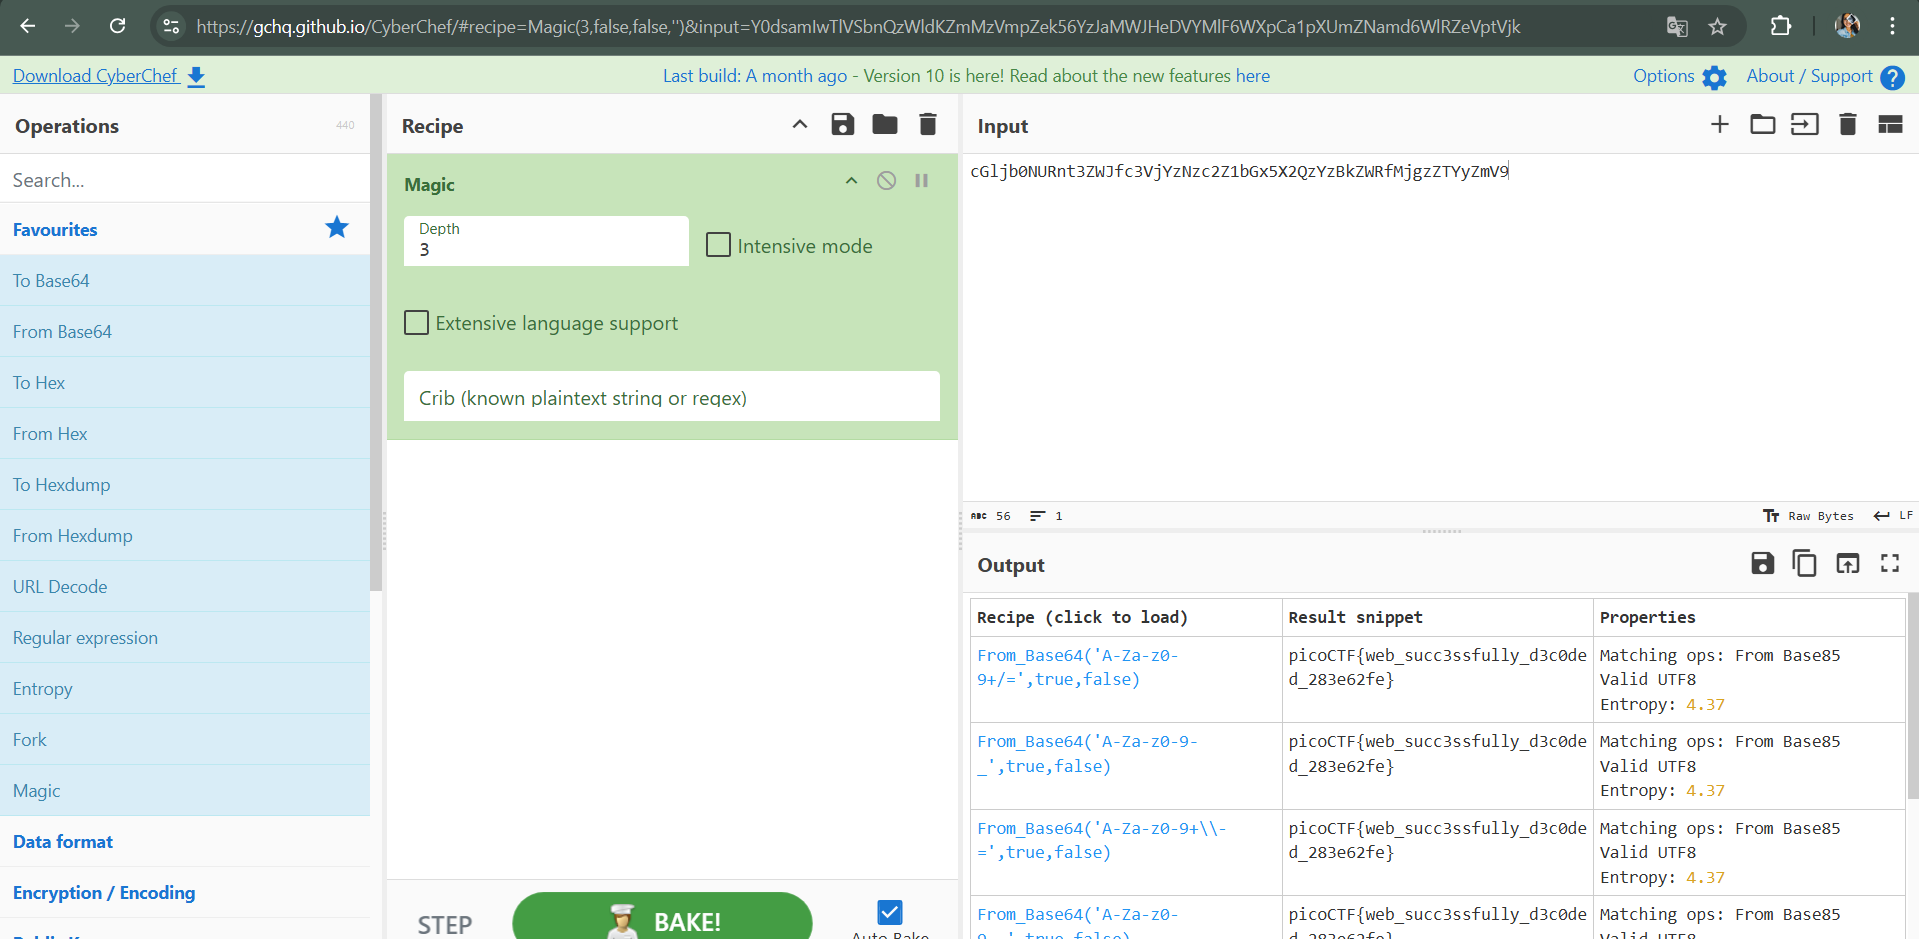

**Answer:** `picoCTF{web_succ3ssfully_d3c0ded_283e62fe}`

**Which OWASP Top 10 was exploited?**

In the picoCTF "Web Decode" challenge, the vulnerability exploited is **Security Misconfiguration** (A05) from the OWASP Top 10:2021. This occurs when security settings in application servers, frameworks, libraries, and databases are not configured securely, potentially exposing sensitive information or allowing unauthorized actions. [OWASP](https://owasp.org/Top10/es/A05_2021-Security_Misconfiguration/?utm_source=chatgpt.com)

**What would be a way to patch the vulnerability?**

To mitigate Security Misconfiguration:

- *Implement Secure Installation Processes:* Establish repeatable hardening processes to ensure environments are securely configured. Development, QA, and production environments should be configured identically, with different credentials used in each.
OWASP

- *Remove Unnecessary Features:* Disable or uninstall features and frameworks that are not used to reduce the attack surface.
OWASP

- *Review and Update Configurations:* Regularly review and update configurations, including security notes, updates, and patches as part of the patch management process.
OWASP

- *Review Cloud Storage Permissions:* Ensure that cloud storage permissions, such as S3 bucket permissions, are correctly configured to prevent unauthorized access.
OWASP

- *Implement a Segmented Application Architecture:* Use segmentation, containerization, or cloud security groups (ACLs) to provide effective and secure separation between components or instances.
OWASP

- *Send Security Directives to Clients:* Configure security headers appropriately to protect the application from common threats.
OWASP

- *Automate Configuration Verification:* Establish automated processes to verify the effectiveness of configurations and settings in all environments.

 [OWASP](https://owasp.org/Top10/es/A05_2021-Security_Misconfiguration/?utm_source=chatgpt.com)

3. _More SQLi (Steps and Explanation):_

After launching the instance on the picoCTF platform, we will be redirected to the following login screen:

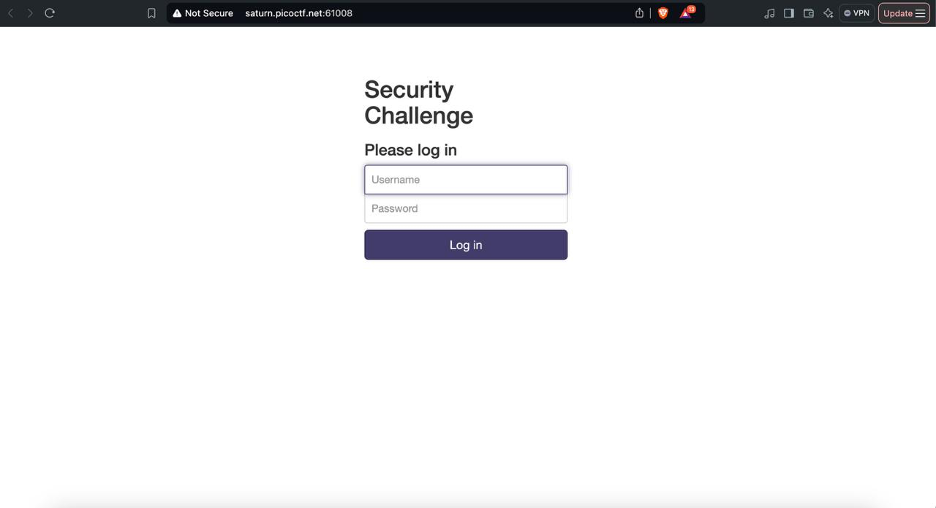



Then, we can input a random username and password, just for testing purposes.

In this case:
- **Username =** `user `
- **Password =** `user`

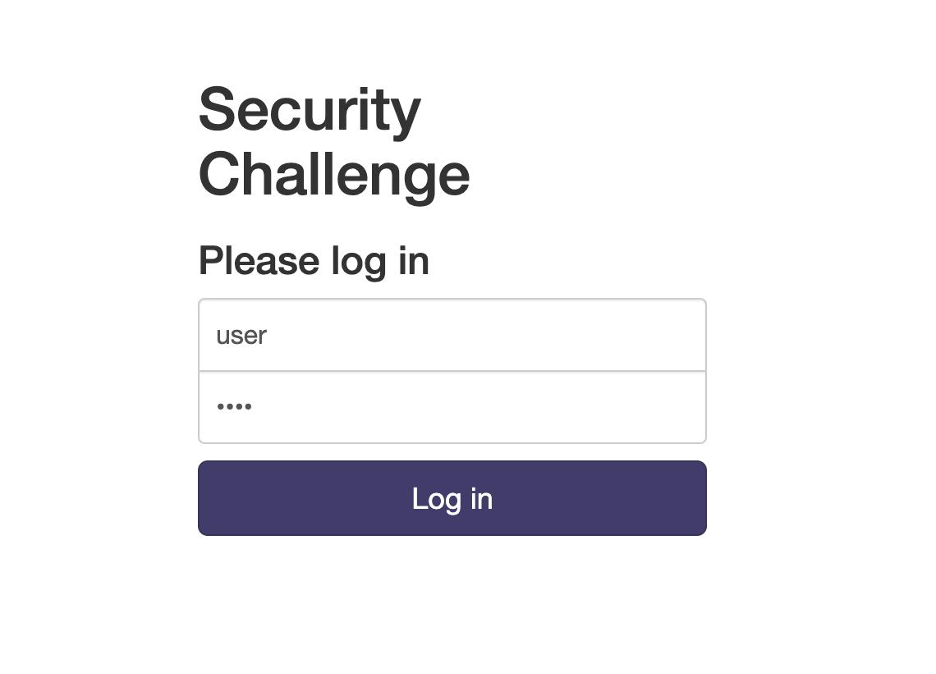

After typing our chosen username and password, we receive this message:

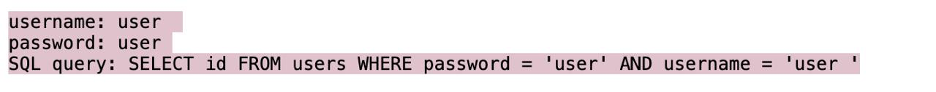



… which shows us a hint (the query for login request) because if we know the query, then we can get it in an easier way by entering this command in the ***“password”*** field:

`'or 1=1;--`

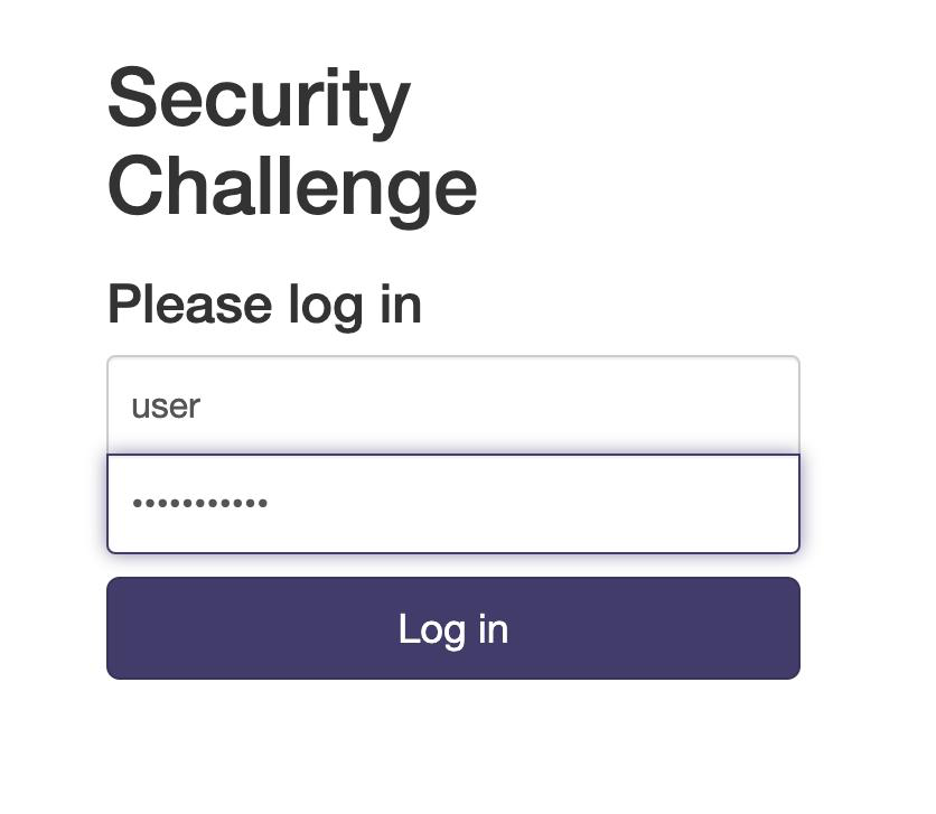

This is done because the result query will do something similar to this:

 `SELECT id FROM users WHERE password = '' or 1=1;--' and username = '123'`

 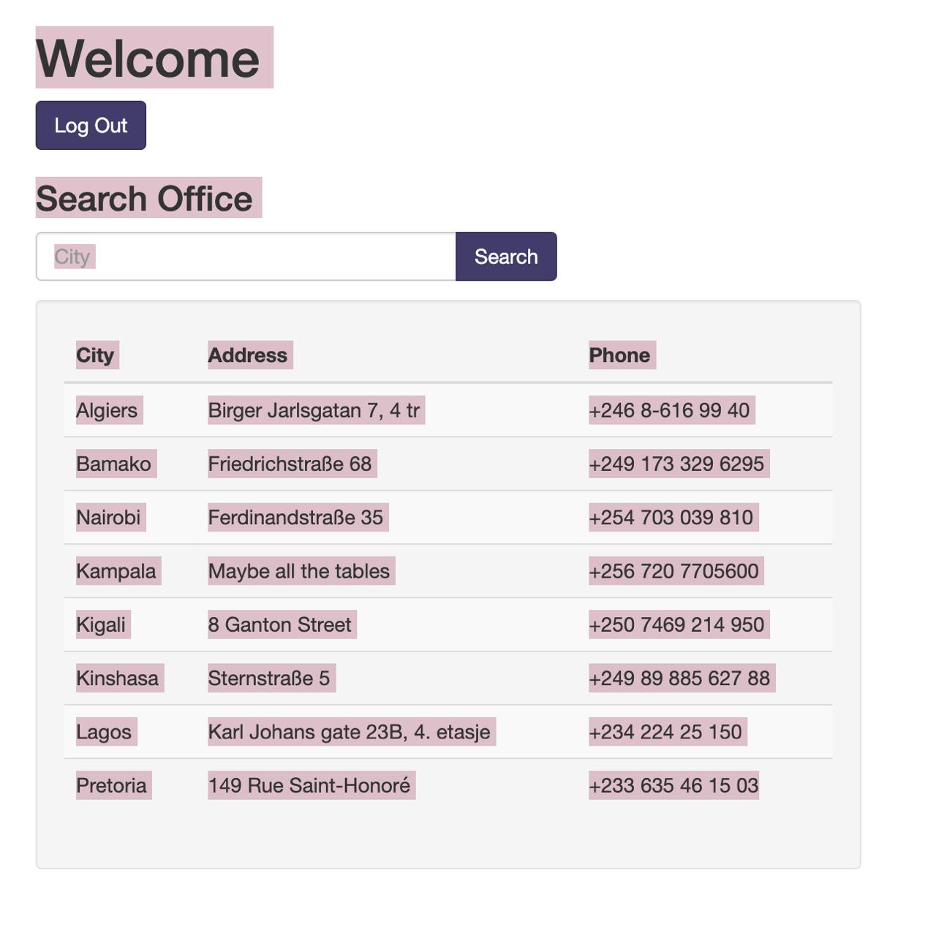

After we get in, we can test some queries to find out the database that’s being used.
-	For example, here we can know about the different system tables for databases: https://www.techonthenet.com/sqlite/sys_tables/index.php

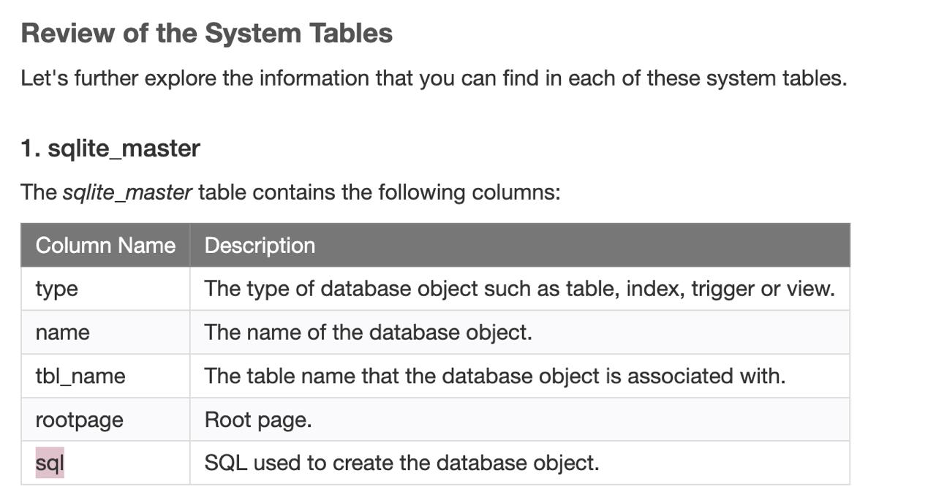

So, if we try entering this query:

`123' UNION SELECT 1, sqlite_version(), 3;--`

... we get to know that the site is using SQLite:

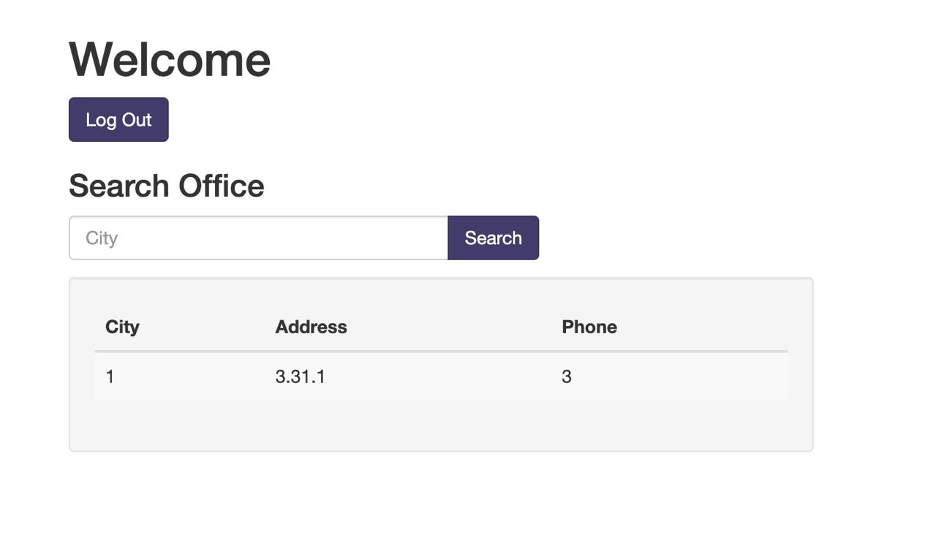

And now we can list all the tables from the database by inputting this query:

`123' UNION SELECT name, sql, null from sqlite_master;--`

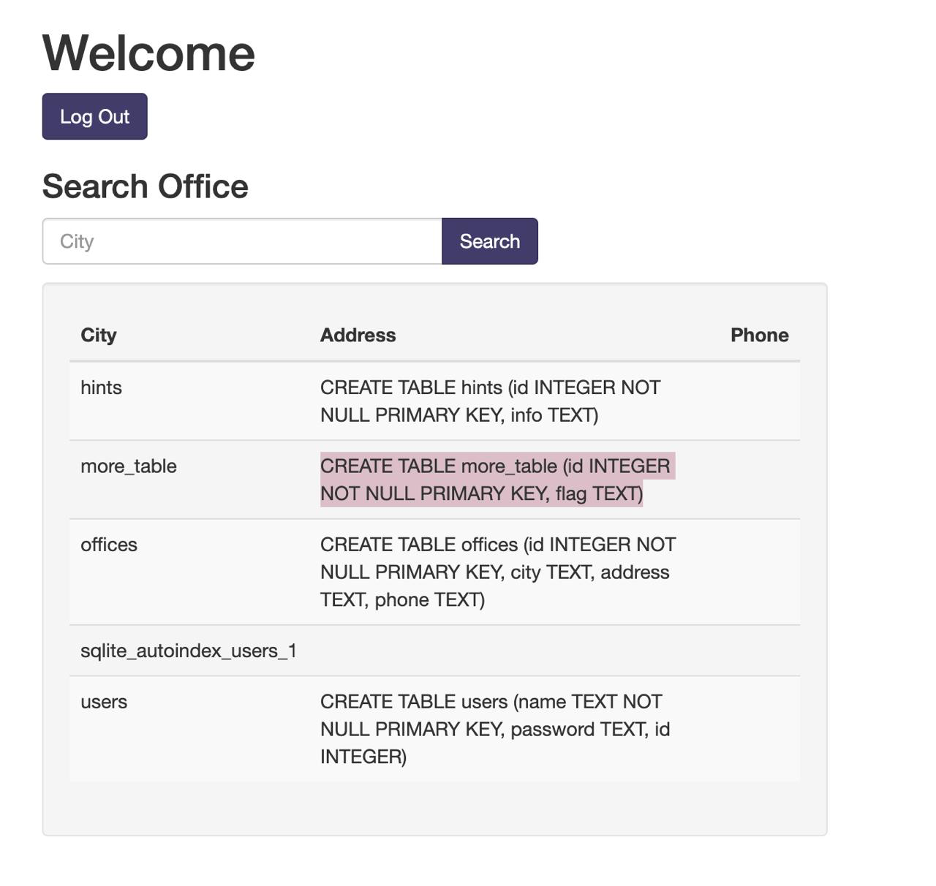

As we can see above, one of the tables seems to have the flag that we need, so we can capture it by entering the query:

`123' UNION SELECT flag, null, null from more_table;--`

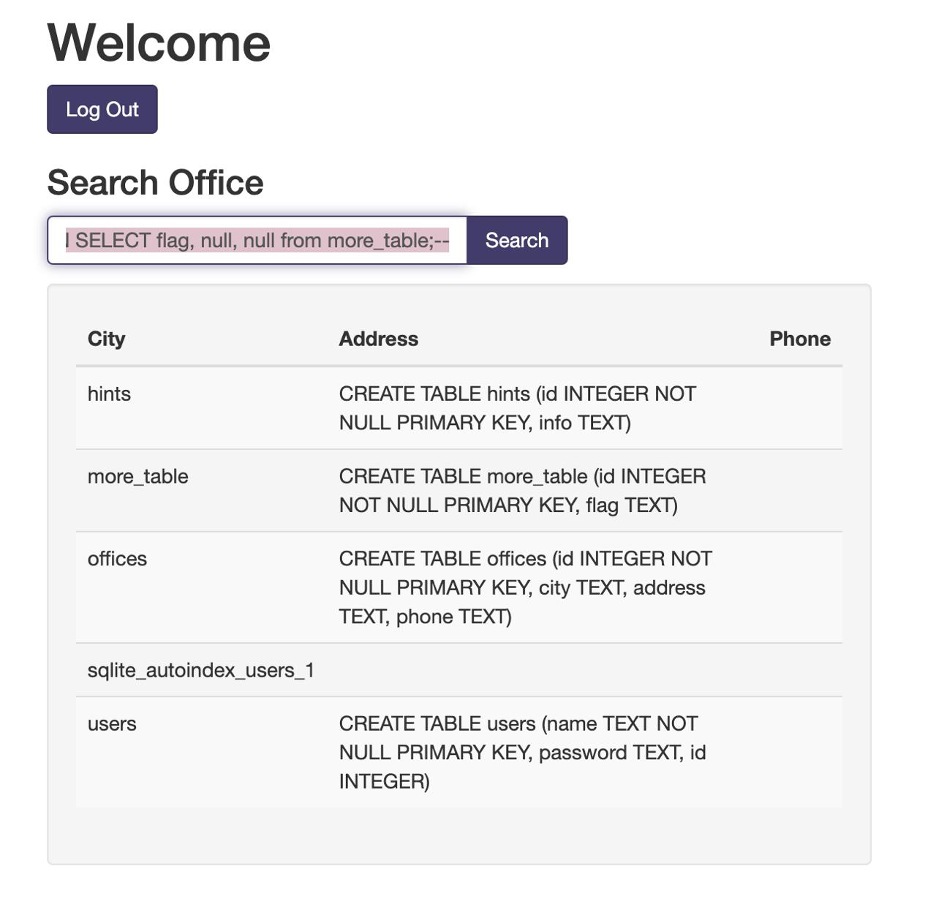

And finally the flag is revealed to us:
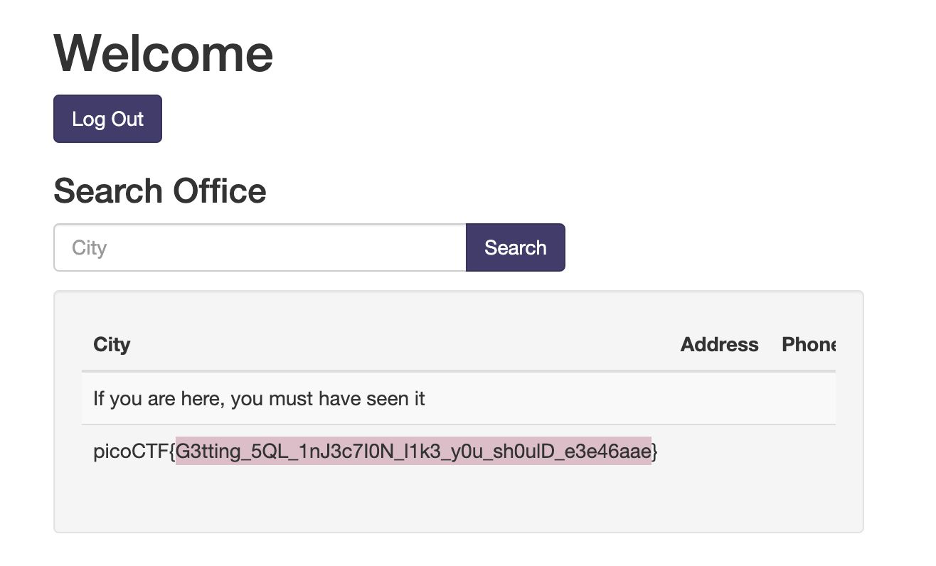

**Answer:** `picoCTF{G3tting_5QL_1nJ3c7I0N_l1k3_y0u_sh0ulD_e3e46aae}`

### **_Which OWASP Top 10 was exploded?_**

The attack described in **_MoreSQLi_** is a `SQL Injection`, which falls under the following OWASP Top 10 category:

**`A03:2021 – Injection:`**

- This category encompasses flaws like SQL Injection, where untrusted data is sent to an interpreter as part of a command or query, leading to unintended execution.
- https://owasp.org/Top10/A03_2021-Injection/?utm_source=chatgpt.com

**`A01:2021 - Broken Access Control:`**

- The attack manipulates SQL queries to bypass authentication and gain unauthorized access. By injecting statements such as `OR 1=1`, the user is effectively bypassing access control mechanisms.
- https://owasp.org/Top10/A01_2021-Broken_Access_Control/

---

### **_Ways to patch this vulnerability?_**

To address SQL Injection vulnerabilities:

1. **Use Parameterized Queries (Prepared Statements):** Ensure that SQL queries are parameterized to prevent injection. For example:

`cursor.execute("SELECT id FROM users WHERE username = ? AND password = ?", (username, password))`

-> This approach ensures that user inputs are treated strictly as data.

2. **Input Validation and Sanitization:** Validate and sanitize all user inputs, disallowing unexpected characters or patterns.

3. **Use of Stored Procedures:** Implement stored procedures to enforce the use of parameterized queries.

4. **Principle of Least Privilege:** Ensure the database user account has only the necessary permissions to minimize potential damage from an injection attack.

5. **Implement Web Application Firewalls (WAFs):** Deploy a WAF to detect and block SQL Injection patterns.

----
### Sources:
https://cheatsheetseries.owasp.org/cheatsheets/Query_Parameterization_Cheat_Sheet.html?utm_source=chatgpt.com

## **Part 2: WAF**

Web application firewalls (WAFs) are a technology that helps protect web applications from common attacks.

- Deploy DVWA in a container, virtual machine, or a cloud provider
- Use a WAF, open source or cloud based, to protect this application
- Demonstrate that attack are not possible anymore against your application.

### **Introduction**

In the realm of cybersecurity, establishing controlled environments is essential for practicing and evaluating attack and defense techniques on web applications. The **Damn Vulnerable Web Application (DVWA)** serves as an educational tool designed for this purpose, providing a secure platform to explore various vulnerabilities. To enhance the security of such applications, **Web Application Firewalls (WAFs)** like **ModSecurity** are employed [Administración de sistemas](https://administraciondesistemas.com/modsecurity-escudo-protector-web/?utm_source=chatgpt.com.) These WAFs act as protective barriers against multiple types of attacks, including SQL injection and cross-site scripting (XSS) . This document details the process of deploying DVWA in a virtualized environment, securing it with ModSecurity, and assessing its effectiveness against simulated attacks launched from a **Kali Linux** machine.

### **Scenario**
The setup involves:

- **Three Virtual Machines**:
  - **DVWA** hosted on an Ubuntu-based virtual machine with Apache as the web server.
  - **2 Kali Linux** for executing penetration tests (attacks).
---

### **Environment Setup**
#### **Step 1: Preparing the Ubuntu VM with DVWA**

1. **Install Apache and PHP**  
   - Command:
     ```bash
     sudo apt update
     sudo apt install apache2 php php-mysql libapache2-mod-php
     ```
   - **Purpose:** Install the web server and necessary PHP modules for DVWA to function.

2. **Install MySQL (or MariaDB):**
   - Command:
     ```bash
     sudo mysql_secure_installation
     ```
   - **Purpose:** Set up a database server for DVWA.

3. **Download and Configure DVWA:**
   - Command:
     ```bash
     sudo git clone https://github.com/digininja/DVWA /var/www/html/dvwa
     sudo chown -R www-data:www-data /var/www/html/dvwa
     sudo chmod -R 755 /var/www/html/dvwa
     ```
   - **Purpose:** Download DVWA into the Apache web directory and set appropriate permissions.

4. **Enable Required Apache Modules:**
   - Command:
     ```bash
     sudo a2enmod rewrite
     sudo systemctl restart apache2
     ```
   - **Purpose:** Enable URL rewriting required by DVWA.

---

#### **Step 2: Setting Up ModSecurity**

1. **Install ModSecurity on Apache:**
   - Command:
     ```bash
     sudo apt install libapache2-mod-security2
     ```
   - **Purpose:** Add the ModSecurity module to Apache.

   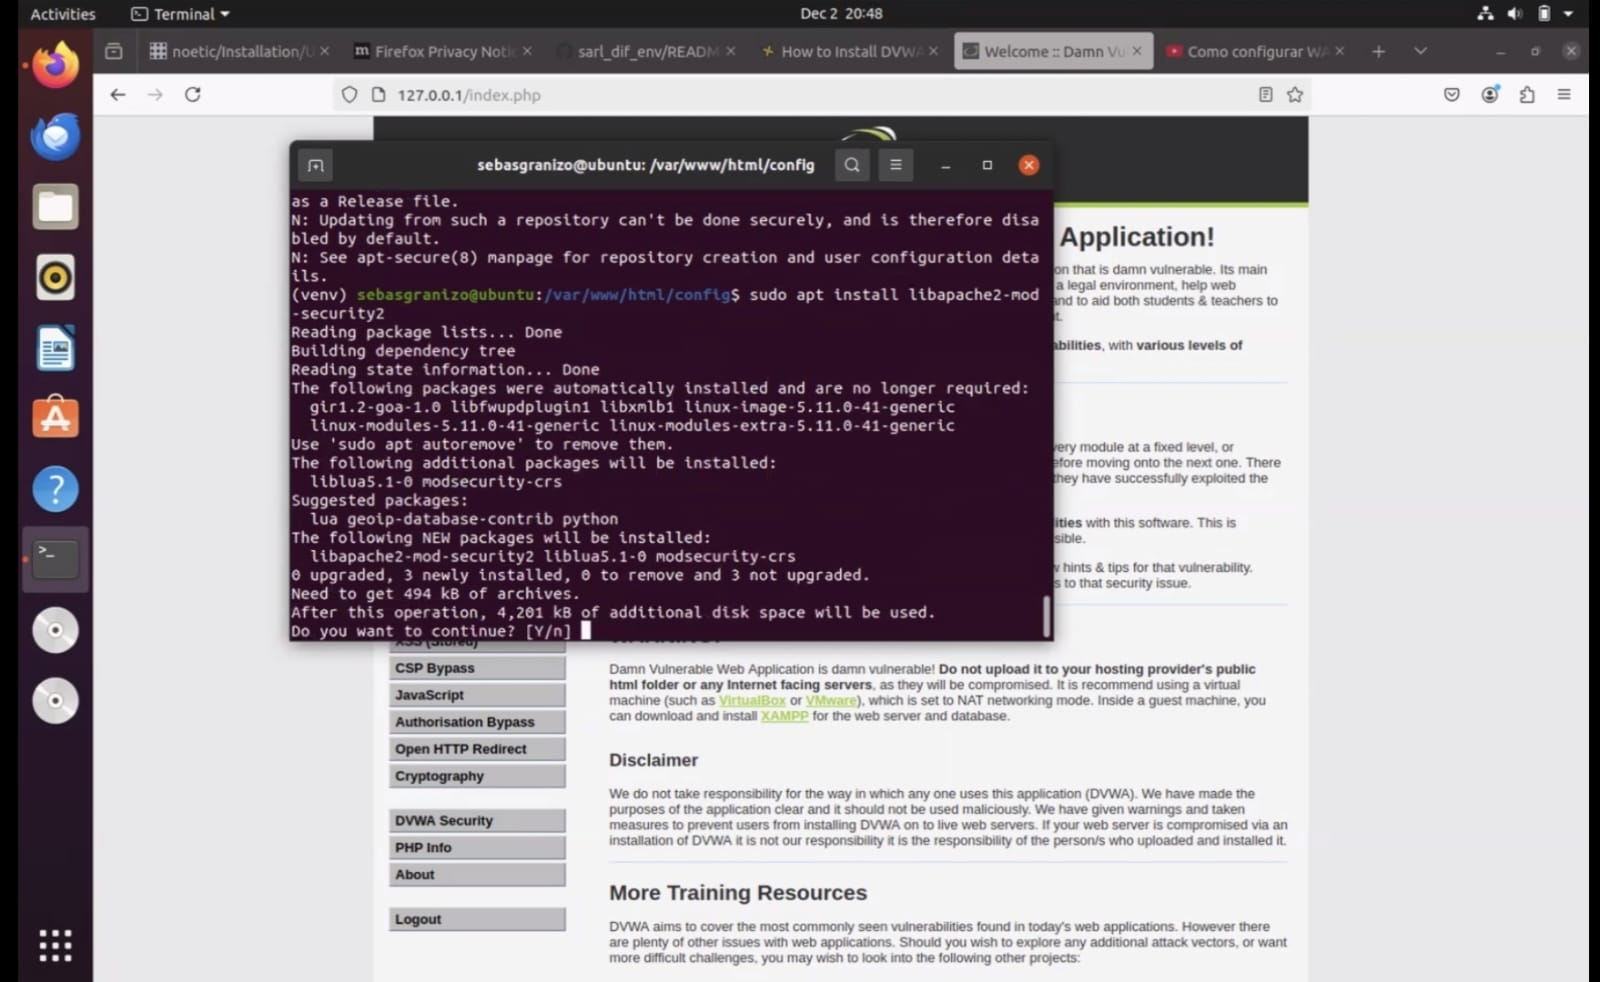

2. **Enable ModSecurity Module:**
   - Command:
     ```bash
     sudo a2enmod security2
     sudo systemctl restart apache2
     ```
   - **Purpose:** Ensure ModSecurity is active and loaded by Apache.
   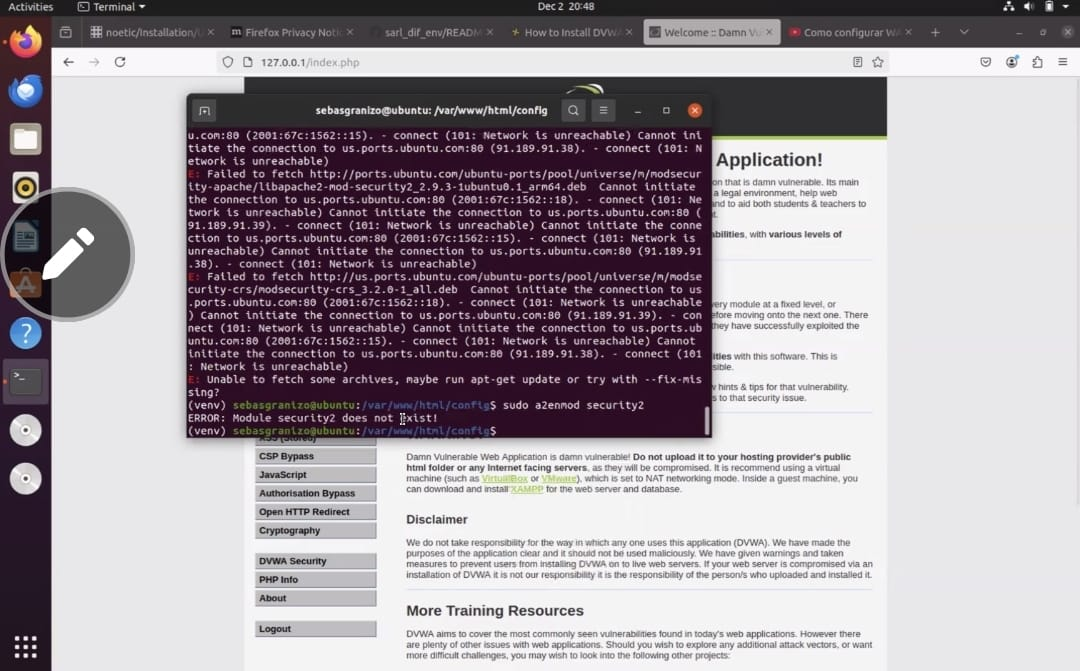
  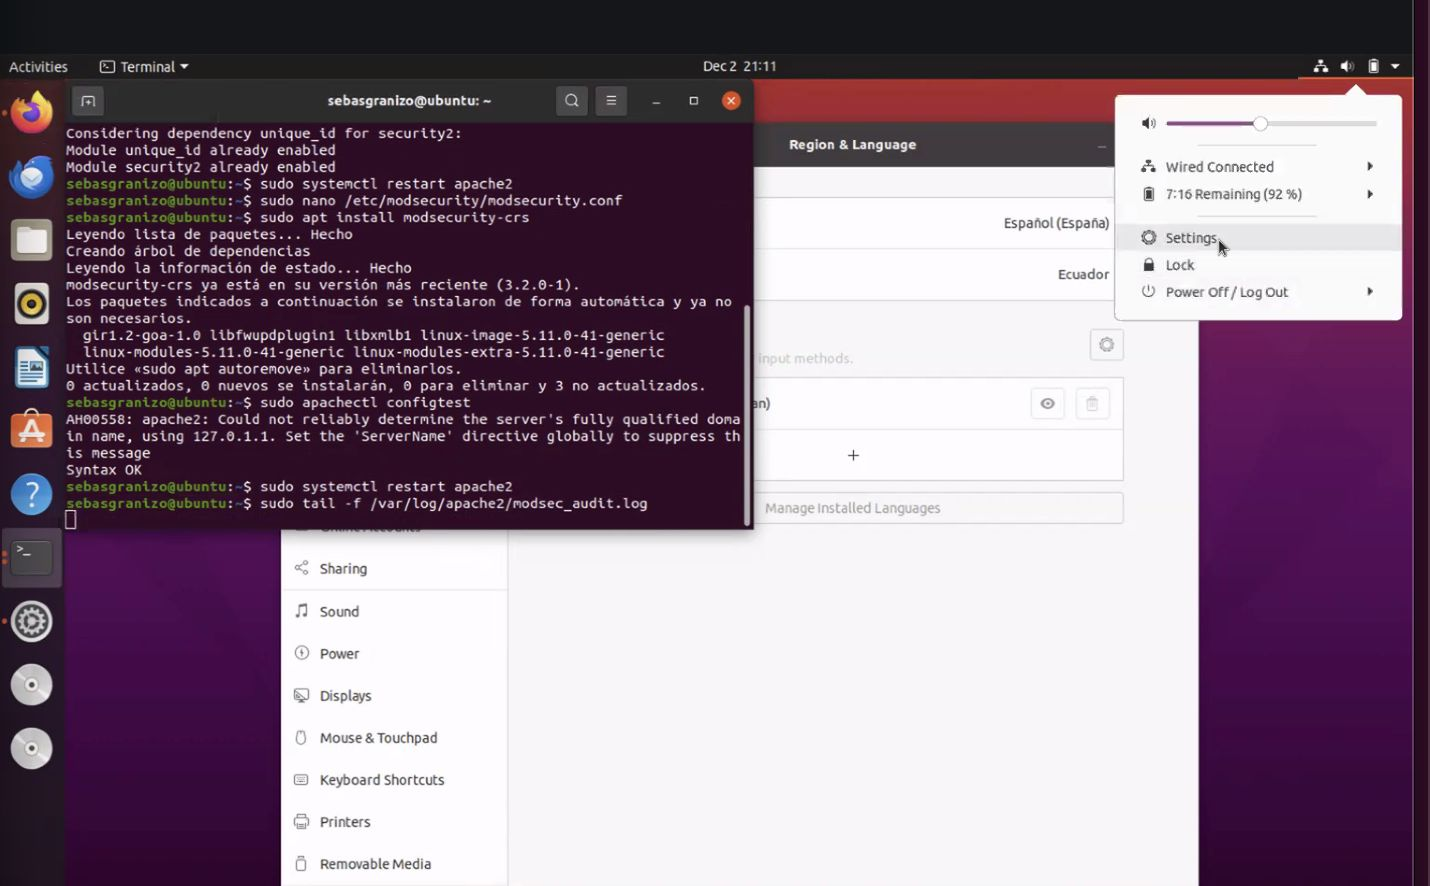
3. **Verify Installation:**
   - Command:
     ```bash
     sudo apachectl -M | grep security
     ```
   - **Purpose:** Confirm that ModSecurity is enabled in Apache.



---

#### **Step 3: Configuring ModSecurity**

1. **Activate ModSecurity Rules:**
   - Edit the ModSecurity configuration file:
     ```bash
     sudo nano /etc/modsecurity/modsecurity.conf
     ```
     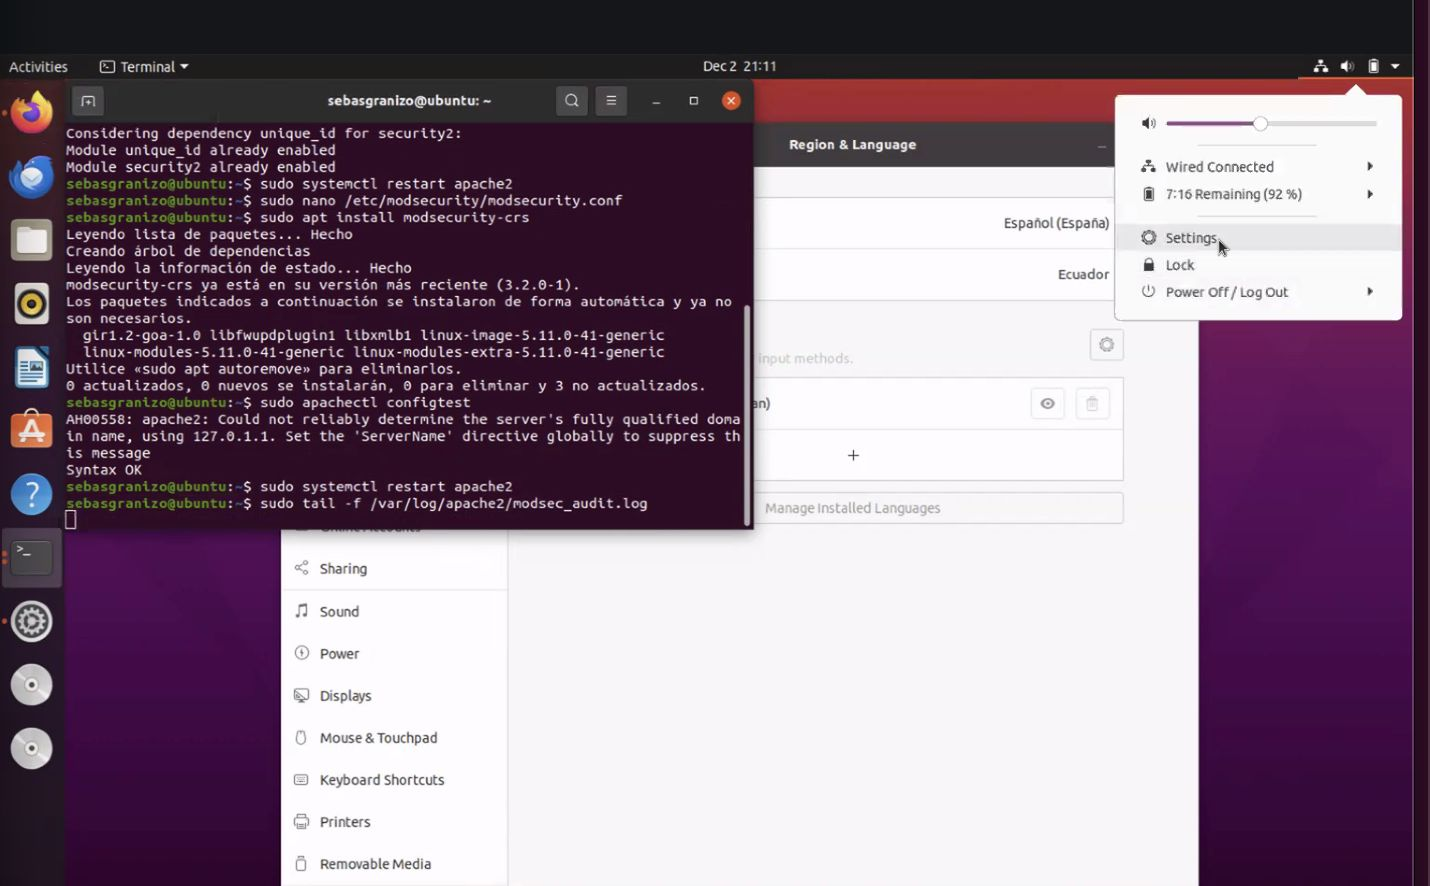
   - Change the following line:
     ```bash
     SecRuleEngine DetectionOnly  # Change this to On
     ```
     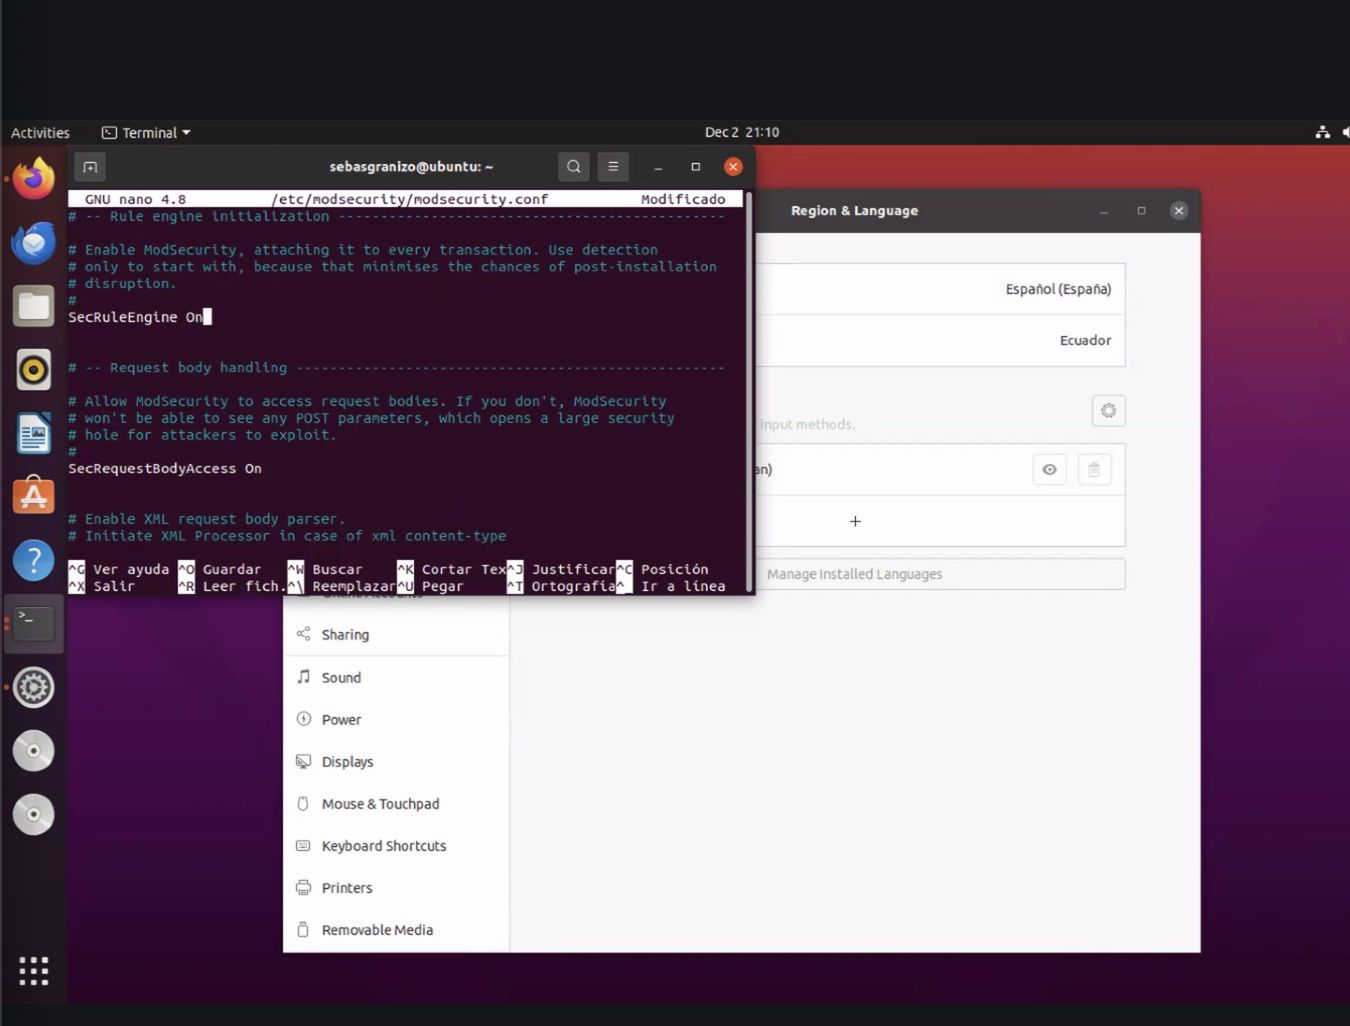
   - **Purpose:** Enable the WAF to actively block malicious traffic.

2. **Install OWASP Core Rule Set (CRS):**
   - Command:
     ```bash
     sudo apt install modsecurity-crs
     ```
    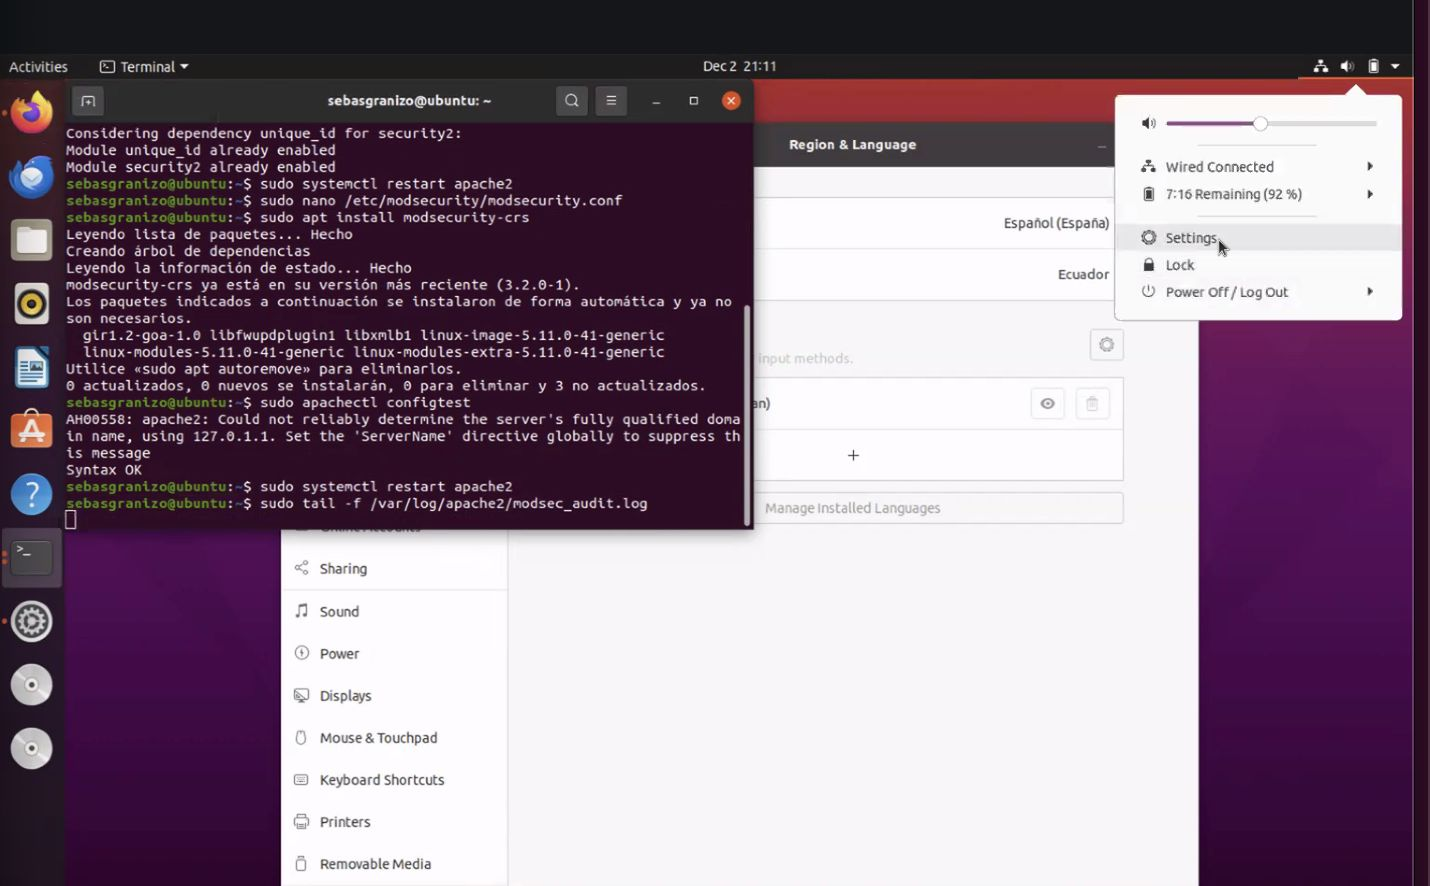
   - **Purpose:** Use predefined OWASP rules to detect and block common attacks.
---

#### **Step 4: Restart Apache and Validate Configuration**

1. **Restart Apache to Apply Changes:**
   - Command:
     ```bash
     sudo systemctl restart apache2
     ```
   - **Purpose:** Ensure new configurations are applied.

2. **Test Configuration Validity:**
   - Command:
     ```bash
     sudo apachectl configtest
     ```
   - **Purpose:** Ensure there are no syntax errors in the configuration files.
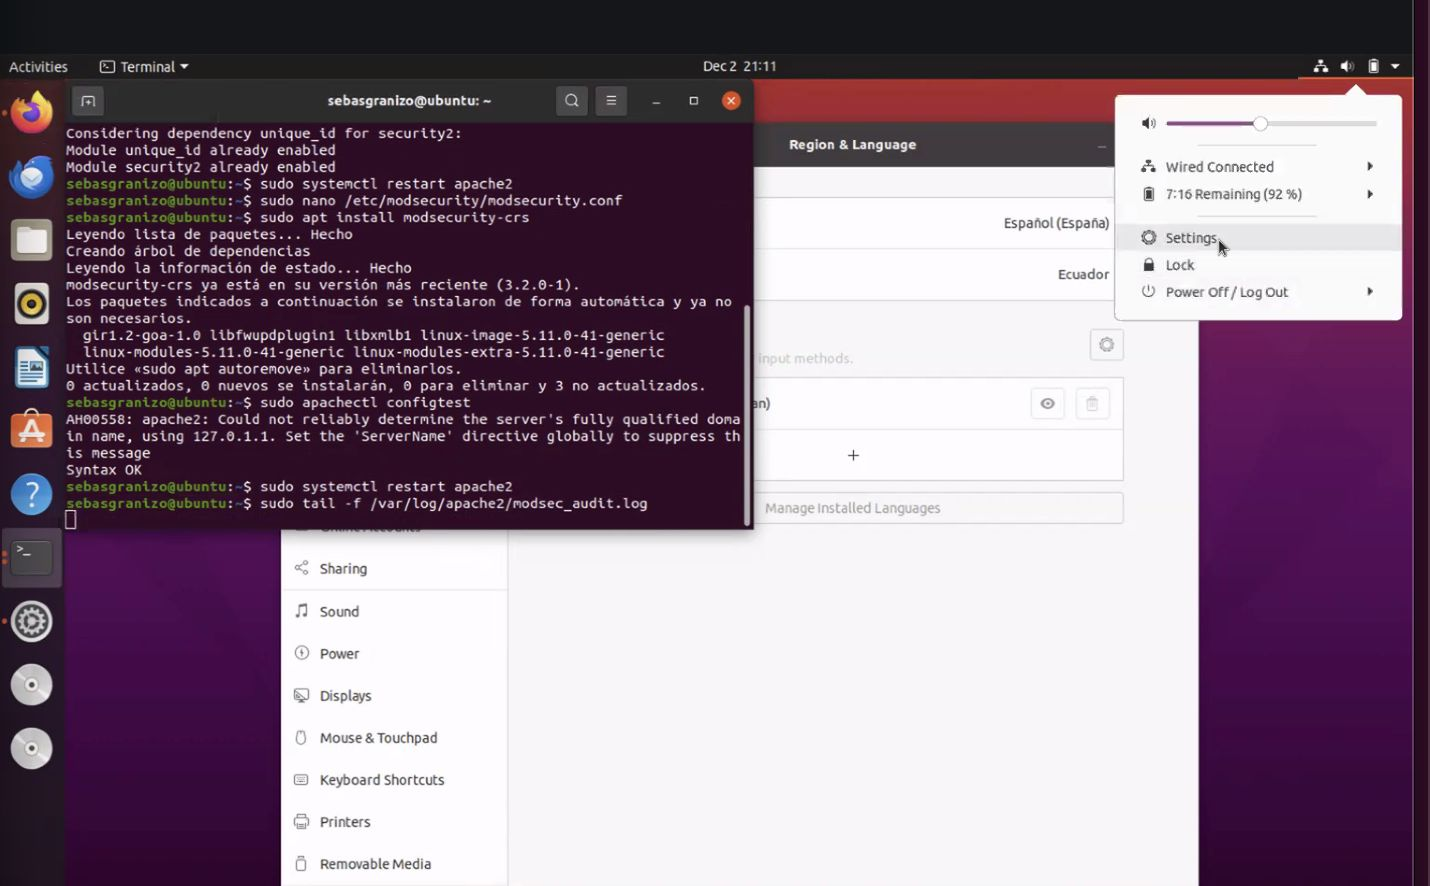

---

### **Executing the Attack Simulation**

#### **Step 5: Setting Up the Kali Linux VM**

1. **Install Virtual Machine with Kali Linux:**
   - Configure the network to "Bridge" mode to allow communication with the DVWA VM.

2. **Update Kali Linux Tools:**
   - Command:
     ```bash
     sudo apt update && sudo apt upgrade
     ```
   - **Purpose:** Ensure the latest tools for penetration testing are available.

---

#### **Step 6: Conducting Penetration Tests**

1. **Simulate a SQL Injection Attack:**
   - Navigate to DVWA and test SQL injection on vulnerable forms.
   - **Purpose:** Verify if ModSecurity detects and blocks malicious queries.

2. **Simulate a Cross-Site Scripting (XSS) Attack:**
   - Inject malicious scripts into input fields.
   - **Purpose:** Test ModSecurity's ability to block XSS.
---
#### **Step 7: Testing SlowHTTP DoS Attack**

1. **Install SlowHTTPTest on Kali Linux:**
   - Command:
     ```bash
     sudo apt install slowhttptest
     ```
   - **Purpose:** Simulate a Slow HTTP DoS attack on DVWA.

2. **Execute the Attack:**
   - Command:
     ```bash
     slowhttptest -c 1000 -H -i 10 -r 200 -t GET -u http://<DVWA_IP>:8080/index.php -x 24 -p 3
     ```
   - **Purpose:** Overwhelm the server with incomplete HTTP requests and test WAF's defense.
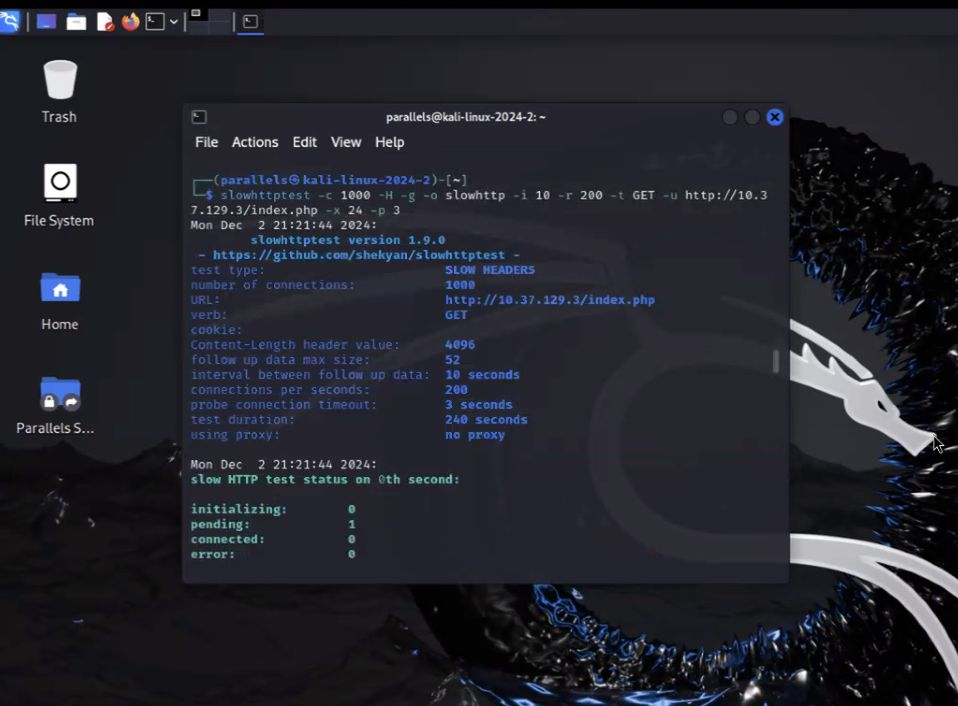
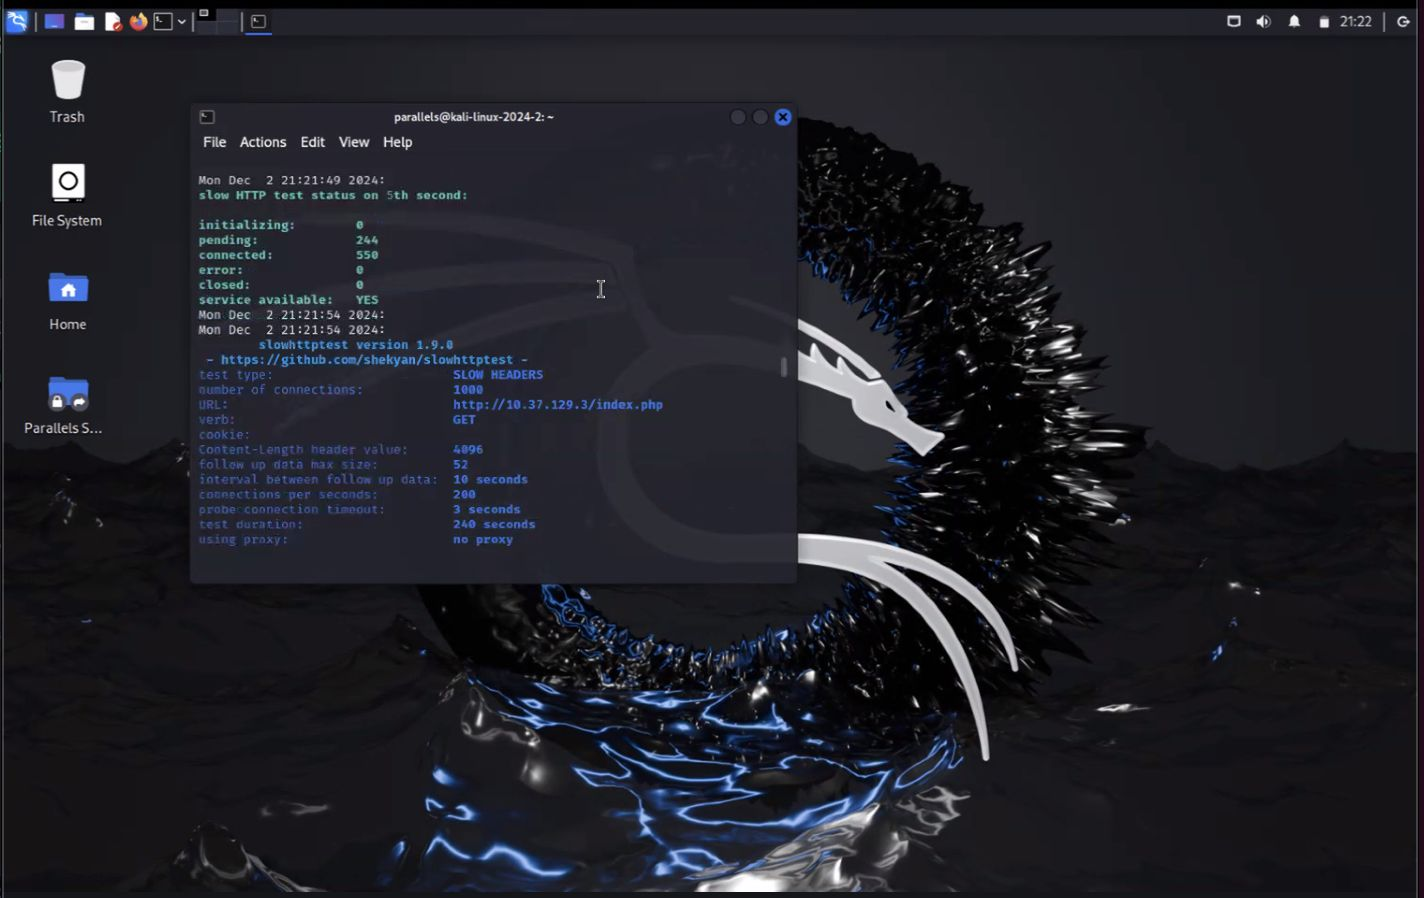
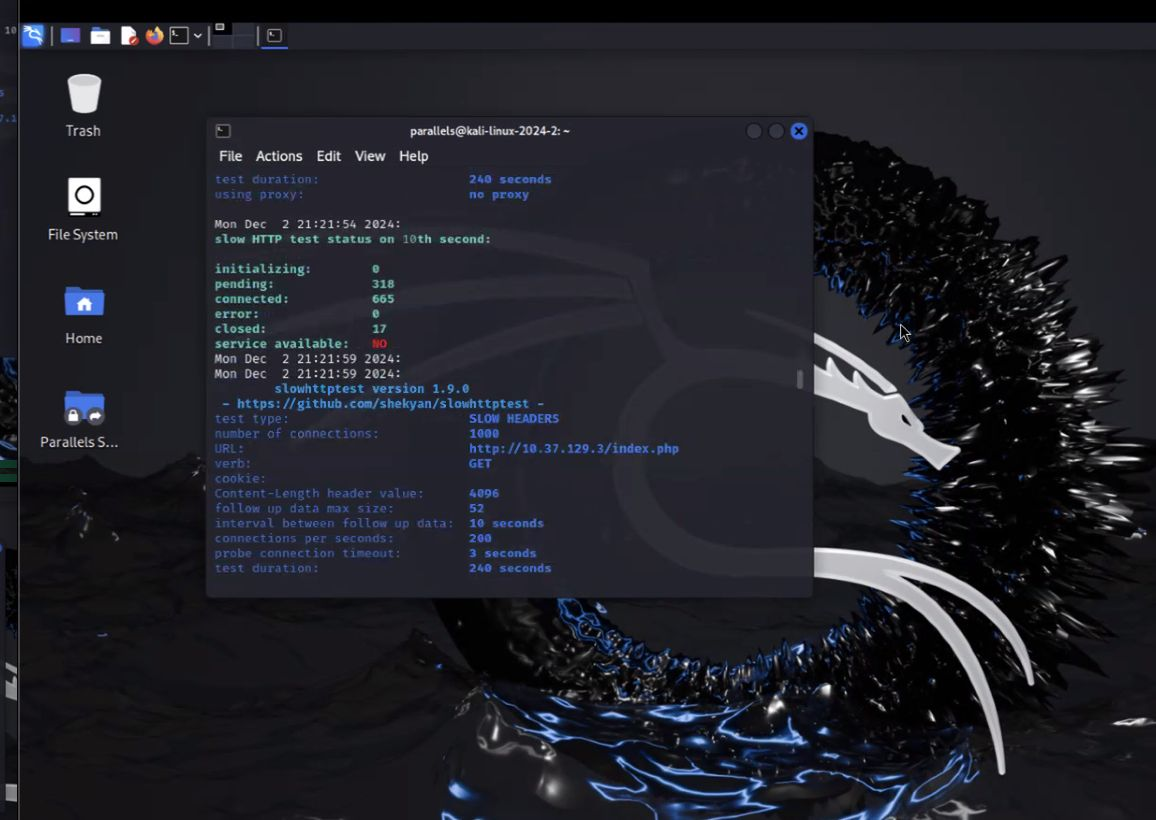
---

#### **Step 8: Monitoring Logs**

1. **View ModSecurity Logs:**
   - Command:
     ```bash
     sudo tail -f /var/log/apache2/modsec_audit.log
     ```
   - **Purpose:** Monitor and analyze blocked requests.

2. **Validate Blocked Attacks:**
   - Look for entries corresponding to SQLi, XSS, and DoS attacks.

   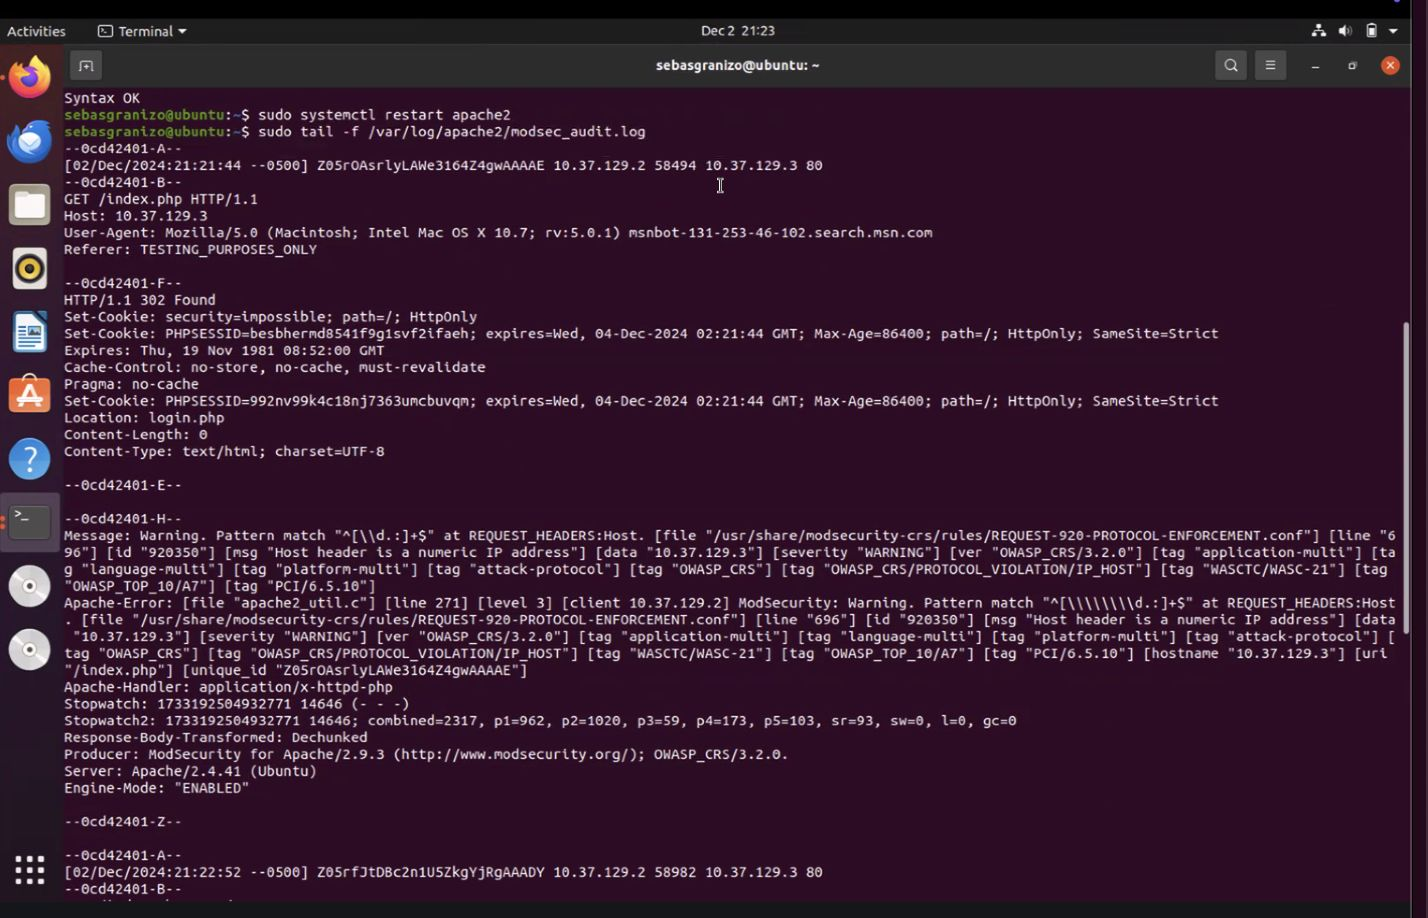
   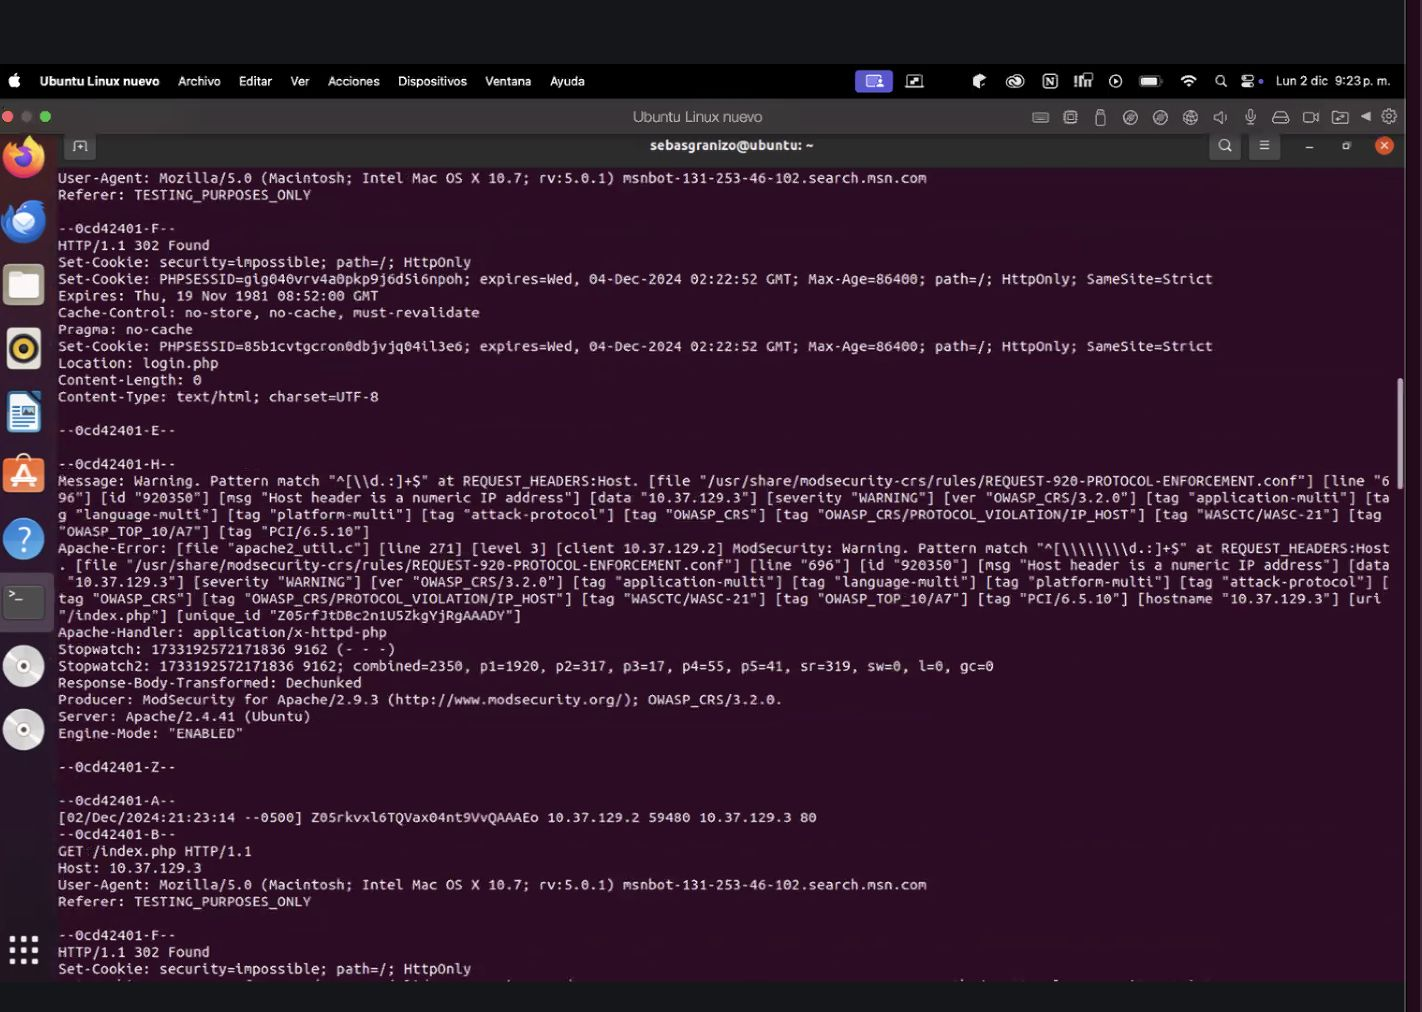
   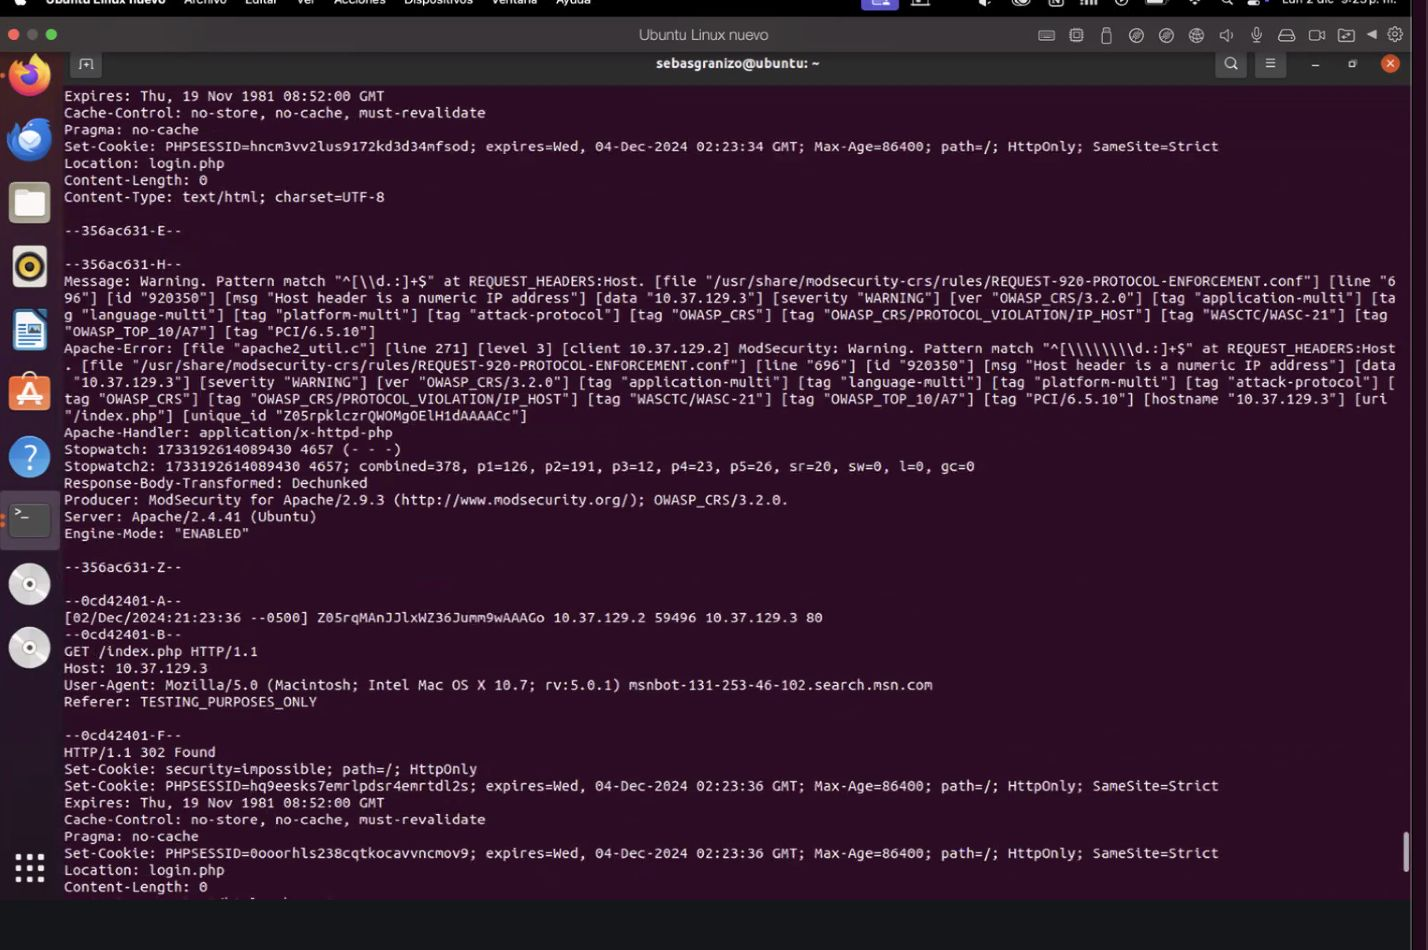

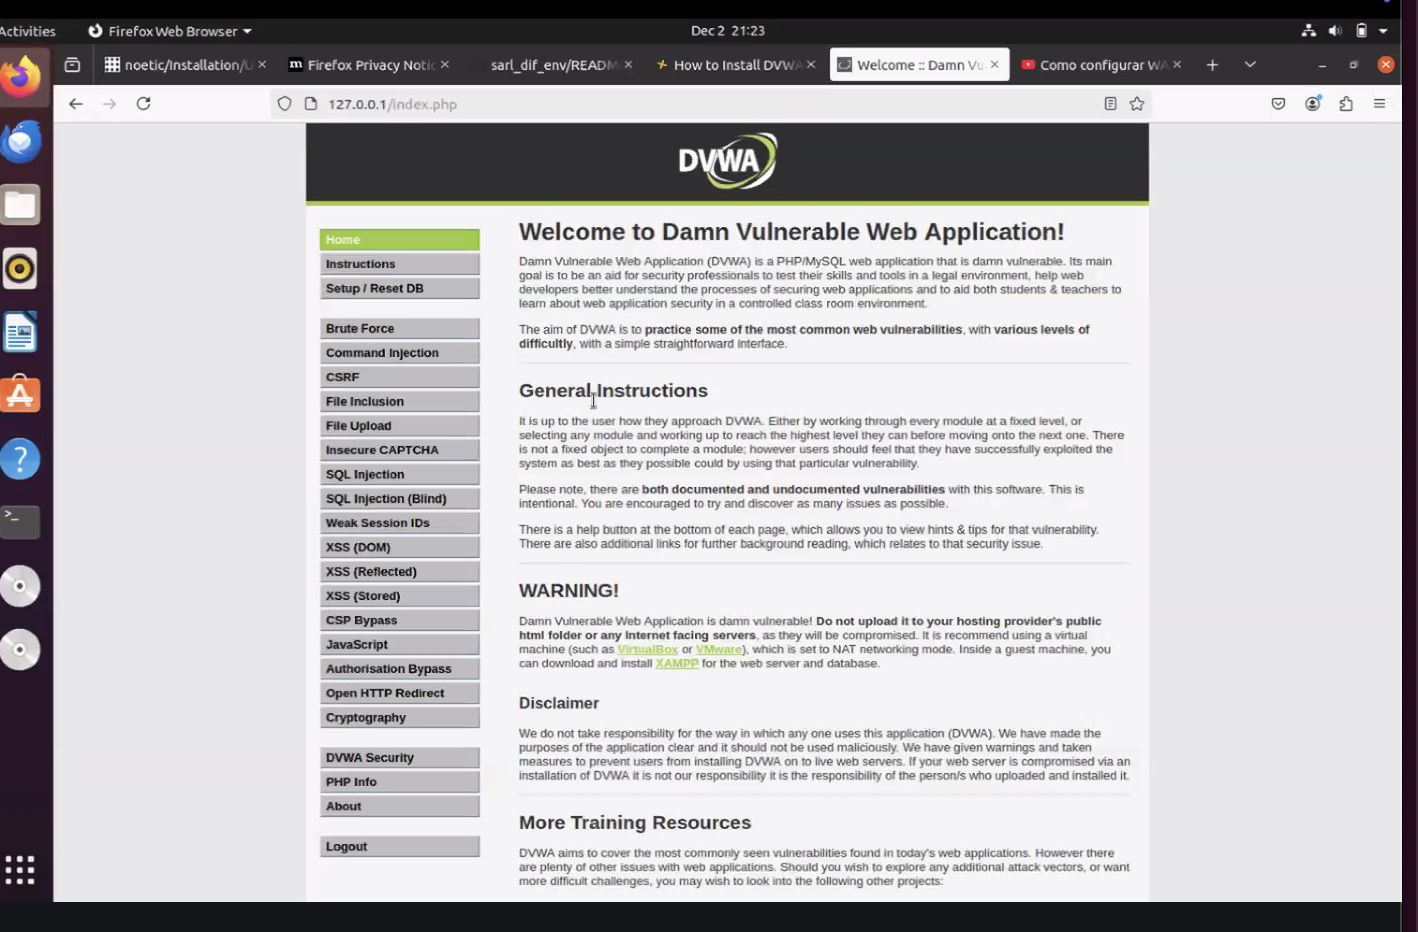

### **Conclusion**

Deploying DVWA in a virtualized environment and securing it with ModSecurity allowed for an effective assessment of the WAF's capability to detect and mitigate common attacks such as SQL injection and XSS. Tests conducted from a Kali Linux machine confirmed that ModSecurity, configured with the OWASP Core Rule Set (CRS), effectively identifies and blocks these threats.